# 1D Machine Learning Experiments Using 10 and 30 Audio Clips

## Import

In [29]:
import librosa
import numpy as np
import os
import pandas as pd
import soundfile
import sys
import joblib
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, fbeta_score,accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
import itertools
from IPython.display import display
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks 

%matplotlib inline

### Note
We define a function that takes a set of features per time frame and stack the mean, so that the data because 1-D.

In [30]:
def feature_to_1d(features):
    result = np.array([])
    mfcc = np.mean(features.T, axis=0)
    result = np.hstack((result, mfcc))
    return result

## Load Data

In [31]:
# MFCC 10 seconds
f = open('IEMOCAP_Data/Data_10_sec/X_train_mfcc', 'rb')
X_train_10_mfcc = joblib.load(f)
f.close()

f = open('IEMOCAP_Data/Data_10_sec/X_test_mfcc', 'rb')
X_test_10_mfcc = joblib.load(f)
f.close()

f = open('IEMOCAP_Data/Data_10_sec/y_train_mfcc', 'rb')
y_train_10_mfcc = joblib.load(f)
f.close()

f = open('IEMOCAP_Data/Data_10_sec/y_test_mfcc', 'rb')
y_test_10_mfcc = joblib.load(f)
f.close()

# MFCC 30 seconds
f = open('IEMOCAP_Data/Data_30_sec/X_train_mfcc', 'rb')
X_train_30_mfcc = joblib.load(f)
f.close()

f = open('IEMOCAP_Data/Data_30_sec/X_test_mfcc', 'rb')
X_test_30_mfcc = joblib.load(f)
f.close()

f = open('IEMOCAP_Data/Data_30_sec/y_train_mfcc', 'rb')
y_train_30_mfcc = joblib.load(f)
f.close()

f = open('IEMOCAP_Data/Data_30_sec/y_test_mfcc', 'rb')
y_test_30_mfcc = joblib.load(f)
f.close()

# Mel 10 seconds
f = open('IEMOCAP_Data/Data_10_sec/X_train_mel', 'rb')
X_train_10_mel = joblib.load(f)
f.close()

f = open('IEMOCAP_Data/Data_10_sec/X_test_mel', 'rb')
X_test_10_mel = joblib.load(f)
f.close()

f = open('IEMOCAP_Data/Data_10_sec/y_train_mel', 'rb')
y_train_10_mel = joblib.load(f)
f.close()

f = open('IEMOCAP_Data/Data_10_sec/y_test_mel', 'rb')
y_test_10_mel = joblib.load(f)
f.close()

# Mel 30 seconds
f = open('IEMOCAP_Data/Data_30_sec/X_train_mel', 'rb')
X_train_30_mel = joblib.load(f)
f.close()

f = open('IEMOCAP_Data/Data_30_sec/X_test_mel', 'rb')
X_test_30_mel = joblib.load(f)
f.close()

f = open('IEMOCAP_Data/Data_30_sec/y_train_mel', 'rb')
y_train_30_mel = joblib.load(f)
f.close()

f = open('IEMOCAP_Data/Data_30_sec/y_test_mel', 'rb')
y_test_30_mel = joblib.load(f)
f.close()

## Convert to 1-D

In [32]:
X_train_10_mfcc_1d = []
X_test_10_mfcc_1d = []

X_train_30_mfcc_1d = []
X_test_30_mfcc_1d = []

X_train_10_mel_1d = []
X_test_10_mel_1d = []

X_train_30_mel_1d = []
X_test_30_mel_1d = []

In [33]:
for i in range(len(X_train_10_mfcc)):
    X_train_10_mfcc_1d.append(feature_to_1d(X_train_10_mfcc[i]))
for i in range(len(X_test_10_mfcc)):
    X_test_10_mfcc_1d.append(feature_to_1d(X_test_10_mfcc[i]))
for i in range(len(X_train_30_mfcc)):
    X_train_30_mfcc_1d.append(feature_to_1d(X_train_30_mfcc[i]))
for i in range(len(X_test_30_mfcc)):
    X_test_30_mfcc_1d.append(feature_to_1d(X_test_30_mfcc[i]))
    
for i in range(len(X_train_10_mel)):
    X_train_10_mel_1d.append(feature_to_1d(X_train_10_mel[i]))
for i in range(len(X_test_10_mel)):
    X_test_10_mel_1d.append(feature_to_1d(X_test_10_mel[i]))
for i in range(len(X_train_30_mel)):
    X_train_30_mel_1d.append(feature_to_1d(X_train_30_mel[i]))
for i in range(len(X_test_30_mel)):
    X_test_30_mel_1d.append(feature_to_1d(X_test_30_mel[i]))

In [34]:
X_train_10_mfcc = np.array(X_train_10_mfcc_1d)
X_test_10_mfcc = np.array(X_test_10_mfcc_1d)

X_train_30_mfcc = np.array(X_train_30_mfcc_1d)
X_test_30_mfcc = np.array(X_test_30_mfcc_1d)

X_train_10_mel = np.array(X_train_10_mel_1d)
X_test_10_mel = np.array(X_test_10_mel_1d)

X_train_30_mel = np.array(X_train_30_mel_1d)
X_test_30_mel = np.array(X_test_30_mel_1d)

In [35]:
print(X_train_10_mfcc.shape)
print(X_train_30_mfcc.shape)
print(X_train_10_mel.shape)
print(X_train_30_mel.shape)

print(X_test_10_mfcc.shape)
print(X_test_30_mfcc.shape)
print(X_test_10_mel.shape)
print(X_test_30_mel.shape)

(2100, 40)
(2100, 40)
(2100, 128)
(2100, 128)
(900, 40)
(900, 40)
(900, 128)
(900, 128)


## Transform the y data
The y data containing the labels will be transformed into one-hot encoded form, so that the models can classify the categorical accuracy and loss.

In [36]:
y_onehot_train_10_mfcc = y_train_10_mfcc
y_onehot_test_10_mfcc = y_test_10_mfcc

y_onehot_train_30_mfcc = y_train_30_mfcc
y_onehot_test_30_mfcc = y_test_30_mfcc

y_onehot_train_10_mel = y_train_10_mel
y_onehot_test_10_mel = y_test_10_mel

y_onehot_train_30_mel = y_train_30_mel
y_onehot_test_30_mel = y_test_30_mel

In [37]:
y_onehot_train_10_mfcc = pd.get_dummies(y_onehot_train_10_mfcc)
y_onehot_test_10_mfcc = pd.get_dummies(y_onehot_test_10_mfcc)

y_onehot_train_30_mfcc = pd.get_dummies(y_onehot_train_30_mfcc)
y_onehot_test_30_mfcc = pd.get_dummies(y_onehot_test_30_mfcc)

y_onehot_train_10_mel = pd.get_dummies(y_onehot_train_10_mel)
y_onehot_test_10_mel = pd.get_dummies(y_onehot_test_10_mel)

y_onehot_train_30_mel = pd.get_dummies(y_onehot_train_30_mel)
y_onehot_test_30_mel = pd.get_dummies(y_onehot_test_30_mel)

In [38]:
y_onehot_train_10_mfcc = np.asarray(y_onehot_train_10_mfcc).astype('int8')
y_onehot_test_10_mfcc = np.asarray(y_onehot_test_10_mfcc).astype('int8')

y_onehot_train_30_mfcc = np.asarray(y_onehot_train_30_mfcc).astype('int8')
y_onehot_test_30_mfcc = np.asarray(y_onehot_test_30_mfcc).astype('int8')

y_onehot_train_10_mel = np.asarray(y_onehot_train_10_mel).astype('int8')
y_onehot_test_10_mel = np.asarray(y_onehot_test_10_mel).astype('int8')

y_onehot_train_30_mel = np.asarray(y_onehot_train_30_mel).astype('int8')
y_onehot_test_30_mel = np.asarray(y_onehot_test_30_mel).astype('int8')

## Find clipped indices

In [39]:
f = open('IEMOCAP_Data/Data_10_sec/X_test_mel', 'rb')
X_test_mel_f = joblib.load(f)
f.close()

In [40]:
f = open('IEMOCAP_Data/Data_10_sec/X_train_mel', 'rb')
X_train_mel_f = joblib.load(f)
f.close()

In [41]:
X_test_mel_f.shape

(900, 128, 313)

In [42]:
clipped_indices = []

for i in range(900):
    for j in range(128):
        for k in range(313):
            if(k == 312 and X_test_mel_f[i][j][k] != 0):
                clipped_indices.append(i)

len(clipped_indices)

5120

In [43]:
x_clipped =np.array(clipped_indices)
x_clipped =np.unique(x_clipped)

x_clipped

array([  5,  32,  37,  48,  69,  77,  80,  86, 107, 112, 116, 141, 145,
       154, 168, 172, 204, 210, 231, 236, 330, 351, 372, 417, 419, 464,
       482, 505, 587, 636, 693, 720, 733, 743, 756, 800, 811, 842, 852,
       897])

In [44]:
x_unclipped = []
for i in range(len(X_test_mel_f)):
    if i not in x_clipped:
        x_unclipped.append(i)
x_unclipped = np.array(x_unclipped)

In [45]:
#x_unclipped

len(x_unclipped)

860

## Examine clipped audio in train set

In [46]:
clipped_indices_train = []

for i in range(900):
    for j in range(128):
        for k in range(313):
            if(k == 312 and X_train_mel_f[i][j][k] != 0):
                clipped_indices_train.append(i)

In [47]:
x_clipped_t =np.array(clipped_indices_train)
x_clipped_t =np.unique(x_clipped_t)

len(x_clipped_t)

32

In [48]:
train_labels = []
for i in range(len(y_onehot_train_10_mfcc.argmax(axis=1))):
    if i in x_clipped_t:
        train_labels.append(y_onehot_train_10_mfcc.argmax(axis=1)[i])
test_labels = []
for i in range(len(y_onehot_test_10_mfcc.argmax(axis=1))):
    if i in x_clipped:
        test_labels.append(y_onehot_test_10_mfcc.argmax(axis=1)[i])

len(test_labels)

40

In [49]:
from collections import Counter
train = Counter(train_labels)
test = Counter(test_labels)
print("Train: \n{} \n\nTest: \n{}".format(train, test))

Train: 
Counter({2: 12, 5: 9, 4: 6, 1: 3, 0: 2}) 

Test: 
Counter({2: 10, 1: 9, 0: 8, 4: 7, 5: 6})


In [50]:
print("Train count:\nAnger: {}\nHappy: {}\nSad: {}\nFear: {}\nSurprise: {}\nNeutral: {}\n".format(train_labels.count(0),train_labels.count(1),train_labels.count(2),train_labels.count(3),train_labels.count(4),train_labels.count(5)))

Train count:
Anger: 2
Happy: 3
Sad: 12
Fear: 0
Surprise: 6
Neutral: 9



In [51]:
print("Test count:\nAnger: {}\nHappy: {}\nSad: {}\nFear: {}\nSurprise: {}\nNeutral: {}\n".format(test_labels.count(0),test_labels.count(1),test_labels.count(2),test_labels.count(3),test_labels.count(4),test_labels.count(5)))

Test count:
Anger: 8
Happy: 9
Sad: 10
Fear: 0
Surprise: 7
Neutral: 6



In [52]:
dic_true_val = {}
dic_true_val['ang'] = test_labels.count(0)
dic_true_val['hap'] = test_labels.count(1)
dic_true_val['sad'] = test_labels.count(2)
dic_true_val['fea'] = test_labels.count(3)
dic_true_val['sur'] = test_labels.count(4)
dic_true_val['neu'] = test_labels.count(5)

## Import
Import libraries needed for defining the models.

In [53]:
import segmentation_models as sm
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Lambda, GlobalMaxPooling1D, Concatenate, BatchNormalization, LSTM, Reshape, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from keras_self_attention import SeqSelfAttention
from tensorflow.keras.regularizers import l2

Segmentation Models: using `tf.keras` framework.


### Note
We define some functions for training and testing the machine learning models.

In [54]:
import tensorflow as tf
import tensorflow.keras.backend as K

def f1_loss(y_true, y_pred):

    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)

In [55]:
def print_index(y_true, y_pred):
    #['ang', 'hap', 'sad', 'fea', 'sur', 'neu']
    correct_instances_index = [] #indices of correct predictions
    for i in range(len(y_pred)):
        if(y_true[i] == y_pred[i]):
            correct_instances_index.append(i)
            
    return correct_instances_index
def print_labels(y_true, y_pred):
    #['ang', 'hap', 'sad', 'fea', 'sur', 'neu']
    correct_instances_label = [] #labels of correct predictions
    for i in range(len(y_pred)):
        if(y_true[i] == y_pred[i]):
            correct_instances_label.append(y_pred[i])
            
    return correct_instances_label

In [56]:
def count_label(x):
    ang = 0
    hap = 0
    sad = 0
    fea = 0
    sur = 0
    neu = 0
    
    dic = {}
    #my_dict['name']='Nick'
    for i in range(len(x)):
        if(x[i]==0):
            ang += 1
        elif(x[i]==1):
            hap += 1
        elif(x[i]==2):
            sad += 1
        elif(x[i]==3):
            fea += 1
        elif(x[i]==4):
            sur += 1
        elif(x[i]==5):
            neu += 1
    dic['ang'] = ang
    dic['hap'] = hap
    dic['sad'] = sad
    dic['fea'] = fea
    dic['sur'] = sur
    dic['neu'] = neu
    
    return dic

In [57]:
checkpoint_path = 'IEMOCAP_Data/Weights/best_weights.hdf5'

#-> Save the best weights
mcp_save = callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True,
                           monitor='val_categorical_accuracy',
                           mode='max')
#-> Reduce learning rate after 100 epoches without improvement.
rlrop = callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', 
                                    factor=0.1, patience=100)

## Results using Machine Learning algorithms

In this section of the notebook, we perform experiments on the data we have using traditional Machine Learning algorithms. We define a set of functions to visualize the performance of each ML model.

In [58]:
emotion_dict = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'fea': 3,
                'sur': 4,
                'neu': 5}

emo_keys = list(['ang', 'hap', 'sad', 'fea', 'sur', 'neu'])
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    print(num_classes)
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.3f}'.format(fbeta_score(y_test, pred, beta= 1.0,average='macro')))
    print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emo_keys)

## MFCC ML

### Random Forest Classifier

#### 10 seconds

Training Results
6
Test Set Accuracy =  0.951
Test Set F-score =  0.951
Test Set Precision =  0.952
Test Set Recall =  0.952
Confusion matrix, without normalization
[[361   1   2   0   0   6]
 [  2 330   4   0   0  11]
 [ 22  12 304   0   0  18]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  8   8   8   0   1 325]]


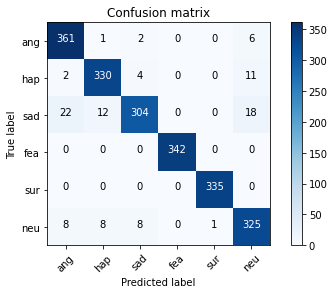

In [150]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=1200, min_samples_split=25)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.737
Test Set F-score =  0.721
Test Set Precision =  0.721
Test Set Recall =  0.733
Confusion matrix, without normalization
[[117   3   4   0   0   6]
 [ 31  70  16   0   9  27]
 [ 17  17  66   0   2  42]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  7  22  29   0   5  87]]


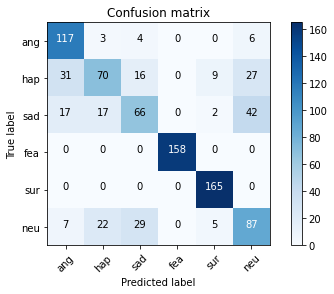

In [151]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


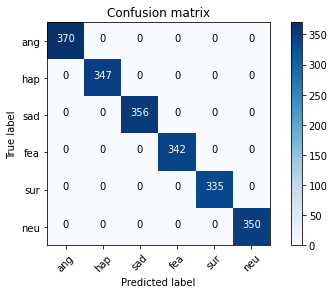

In [156]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=10000, min_samples_split=4)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.762
Test Set F-score =  0.751
Test Set Precision =  0.750
Test Set Recall =  0.758
Confusion matrix, without normalization
[[120   6   4   0   0   0]
 [ 18  83  20   0   3  29]
 [ 12  21  65   0   2  44]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  3  29  23   0   0  95]]


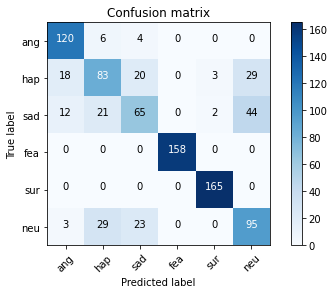

In [157]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


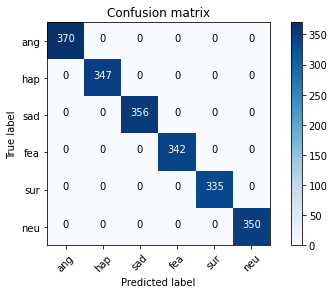

In [153]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=2)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.746
Test Set F-score =  0.733
Test Set Precision =  0.730
Test Set Recall =  0.742
Confusion matrix, without normalization
[[120   4   6   0   0   0]
 [ 25  76  19   0   6  27]
 [ 15  18  72   0   1  38]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  8  27  35   0   0  80]]


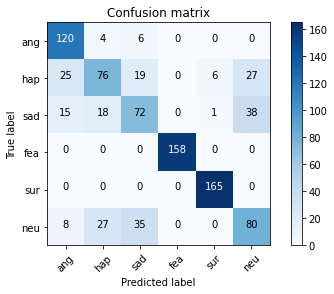

In [154]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


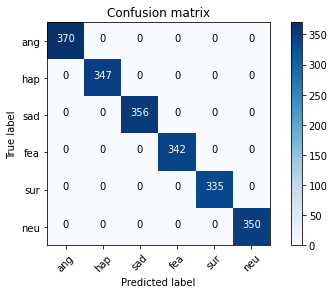

In [155]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=4)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.742
Test Set F-score =  0.729
Test Set Precision =  0.727
Test Set Recall =  0.739
Confusion matrix, without normalization
[[120   6   2   0   0   2]
 [ 24  71  22   0   6  30]
 [ 10  21  66   0   1  46]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  5  27  29   0   1  88]]


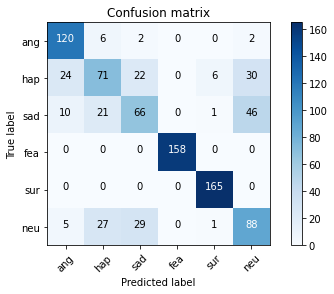

In [156]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[369   0   0   0   0   1]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


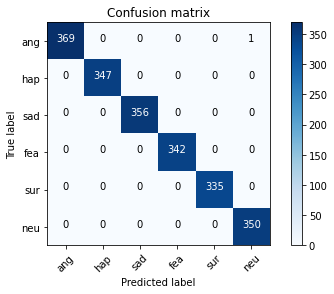

In [157]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=8)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.742
Test Set F-score =  0.728
Test Set Precision =  0.725
Test Set Recall =  0.739
Confusion matrix, without normalization
[[123   4   0   0   0   3]
 [ 23  76  22   0   7  25]
 [ 14  20  65   0   2  43]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  9  29  28   0   3  81]]


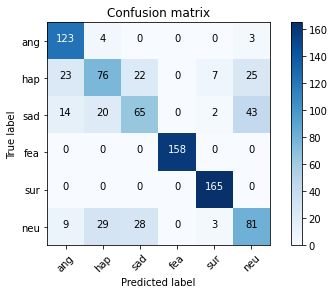

In [158]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.984
Test Set F-score =  0.985
Test Set Precision =  0.985
Test Set Recall =  0.984
Confusion matrix, without normalization
[[368   0   0   0   0   2]
 [  1 341   2   0   0   3]
 [ 11   2 341   0   0   2]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  3   5   2   0   0 340]]


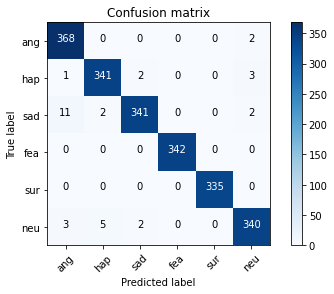

In [159]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=16)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.724
Test Set F-score =  0.707
Test Set Precision =  0.706
Test Set Recall =  0.721
Confusion matrix, without normalization
[[118   8   2   0   0   2]
 [ 31  63  25   0   7  27]
 [ 20  17  65   0   2  40]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [ 10  23  31   0   3  83]]


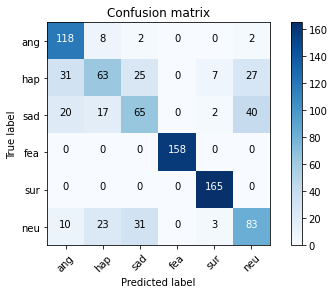

In [160]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.911
Test Set F-score =  0.912
Test Set Precision =  0.913
Test Set Recall =  0.912
Confusion matrix, without normalization
[[348   4   3   0   1  14]
 [  9 304  15   0   1  18]
 [ 26  18 280   0   5  27]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [ 12  15  17   0   1 305]]


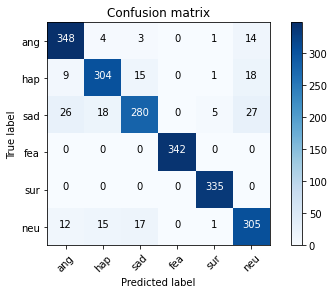

In [161]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=32)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.706
Test Set F-score =  0.687
Test Set Precision =  0.687
Test Set Recall =  0.700
Confusion matrix, without normalization
[[108   8   5   0   2   7]
 [ 32  67  18   0  12  24]
 [ 22  14  61   0   3  44]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [ 13  22  34   0   5  76]]


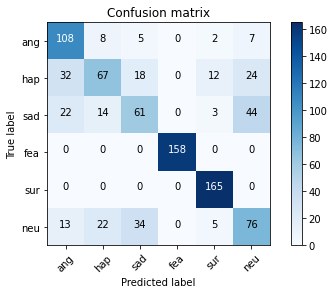

In [162]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.799
Test Set F-score =  0.797
Test Set Precision =  0.806
Test Set Recall =  0.800
Confusion matrix, without normalization
[[327   6   2   0   8  27]
 [ 67 207  21   0  18  34]
 [ 50  22 222   0  10  52]
 [  0   0   0 342   0   0]
 [  0   0  12   0 323   0]
 [ 27  20  30   0  16 257]]


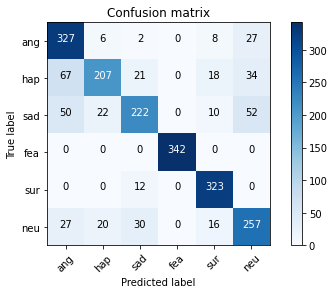

In [163]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=64)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.664
Test Set F-score =  0.644
Test Set Precision =  0.653
Test Set Recall =  0.660
Confusion matrix, without normalization
[[104   7   2   0   6  11]
 [ 39  54  18   0  16  26]
 [ 27   7  60   0   7  43]
 [  0   0   0 158   0   0]
 [  0   0  13   0 152   0]
 [ 16  17  31   0  16  70]]


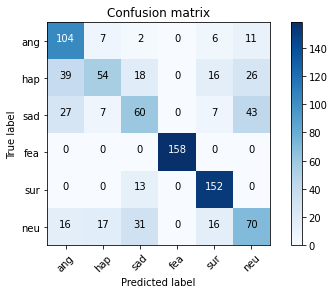

In [164]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.683
Test Set F-score =  0.671
Test Set Precision =  0.685
Test Set Recall =  0.686
Confusion matrix, without normalization
[[279  16  17   6  28  24]
 [106 124  24   5  49  39]
 [ 60  16 195   7  25  53]
 [  0   0   0 342   0   0]
 [  7   5  12   0 311   0]
 [ 34  25  55   4  48 184]]


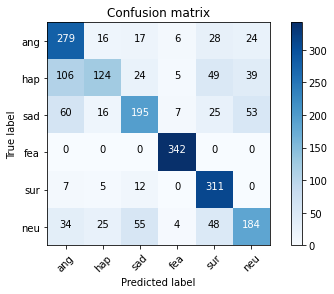

In [165]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=128)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.618
Test Set F-score =  0.591
Test Set Precision =  0.605
Test Set Recall =  0.612
Confusion matrix, without normalization
[[ 94   7   8   2  10   9]
 [ 46  41  17   3  23  23]
 [ 31   7  60   2  14  30]
 [  0   0   0 158   0   0]
 [  2   4  13   0 146   0]
 [ 24   9  42   2  16  57]]


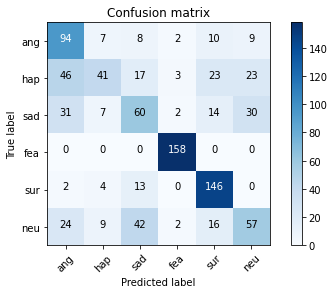

In [166]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


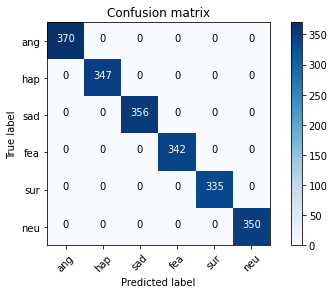

In [167]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=2)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.762
Test Set F-score =  0.751
Test Set Precision =  0.749
Test Set Recall =  0.759
Confusion matrix, without normalization
[[122   4   4   0   0   0]
 [ 20  83  17   0   4  29]
 [ 11  21  70   0   1  41]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  4  31  26   0   1  88]]


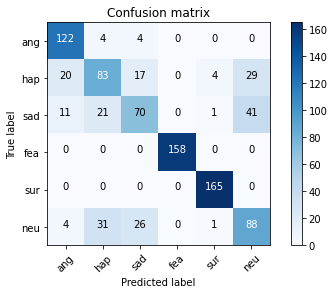

In [168]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


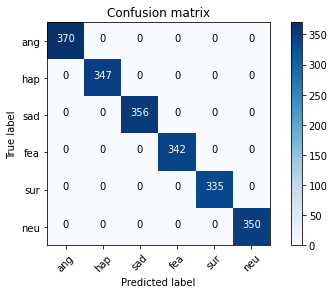

In [169]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=4)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.759
Test Set F-score =  0.748
Test Set Precision =  0.745
Test Set Recall =  0.755
Confusion matrix, without normalization
[[122   4   4   0   0   0]
 [ 18  83  21   0   4  27]
 [  9  26  65   0   1  43]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  5  28  26   0   1  90]]


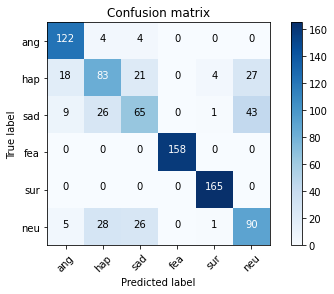

In [170]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


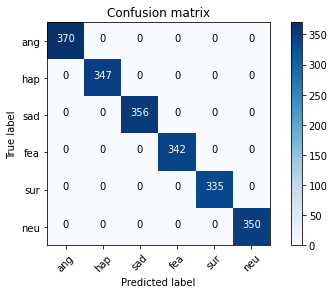

In [171]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=8)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.756
Test Set F-score =  0.743
Test Set Precision =  0.742
Test Set Recall =  0.751
Confusion matrix, without normalization
[[118   8   4   0   0   0]
 [ 22  82  15   0   6  28]
 [ 10  24  63   0   2  45]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  3  26  25   0   2  94]]


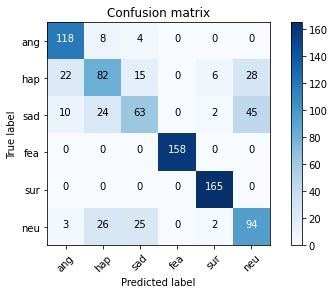

In [172]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.987
Test Set F-score =  0.987
Test Set Precision =  0.987
Test Set Recall =  0.987
Confusion matrix, without normalization
[[366   0   0   0   0   4]
 [  0 345   0   0   0   2]
 [  5   3 344   0   0   4]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  4   3   2   0   0 341]]


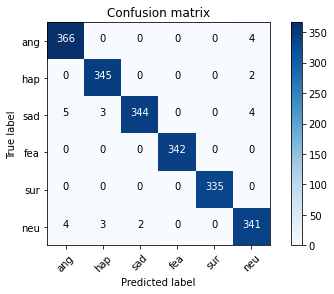

In [173]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=16)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.728
Test Set F-score =  0.711
Test Set Precision =  0.711
Test Set Recall =  0.724
Confusion matrix, without normalization
[[118   4   4   0   0   4]
 [ 28  70  16   0   8  31]
 [ 18  19  60   0   2  45]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [ 10  22  32   0   2  84]]


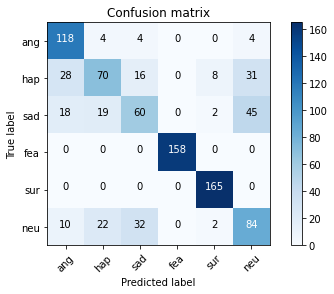

In [174]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.912
Test Set F-score =  0.913
Test Set Precision =  0.915
Test Set Recall =  0.913
Confusion matrix, without normalization
[[353   2   5   0   0  10]
 [ 14 299  15   0   2  17]
 [ 33  17 276   0   2  28]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [ 11  13  14   0   1 311]]


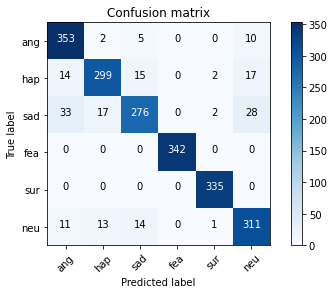

In [175]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=32)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.716
Test Set F-score =  0.698
Test Set Precision =  0.700
Test Set Recall =  0.710
Confusion matrix, without normalization
[[112   4   3   0   2   9]
 [ 34  70  13   0   9  27]
 [ 18  17  62   0   3  44]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [ 12  20  34   0   7  77]]


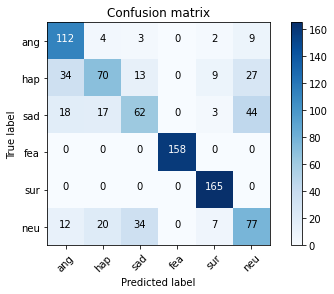

In [176]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.808
Test Set F-score =  0.805
Test Set Precision =  0.812
Test Set Recall =  0.809
Confusion matrix, without normalization
[[330   6   8   0   7  19]
 [ 60 206  25   0  18  38]
 [ 48  25 224   1   9  49]
 [  0   0   0 342   0   0]
 [  0   0   4   0 331   0]
 [ 27  21  31   0   8 263]]


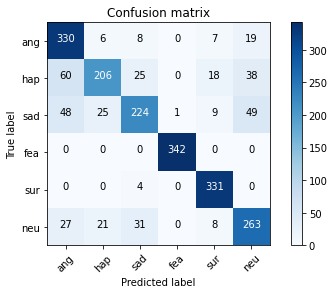

In [177]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=64)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.678
Test Set F-score =  0.654
Test Set Precision =  0.665
Test Set Recall =  0.673
Confusion matrix, without normalization
[[107   5   3   0   6   9]
 [ 43  50  15   0  13  32]
 [ 25   9  60   0   7  43]
 [  0   0   0 158   0   0]
 [  0   0   4   0 161   0]
 [ 17  16  31   0  12  74]]


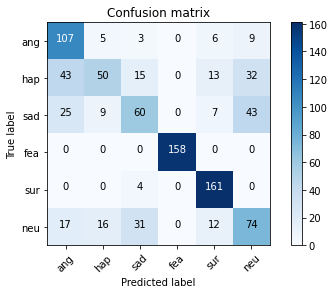

In [178]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.696
Test Set F-score =  0.684
Test Set Precision =  0.709
Test Set Recall =  0.698
Confusion matrix, without normalization
[[292  10   6   4  31  27]
 [118 119  24   2  50  34]
 [ 63  12 200   7  26  48]
 [  0   0   0 342   0   0]
 [ 12   0  12   0 311   0]
 [ 37  22  52   2  39 198]]


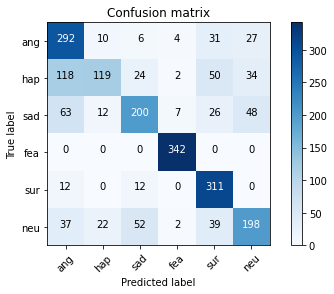

In [179]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=128)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.616
Test Set F-score =  0.588
Test Set Precision =  0.598
Test Set Recall =  0.609
Confusion matrix, without normalization
[[ 92  12   2   2  12  10]
 [ 49  38  13   4  23  26]
 [ 33   9  57   2  12  31]
 [  0   0   0 158   0   0]
 [  6   0  13   0 146   0]
 [ 20  13  35   1  18  63]]


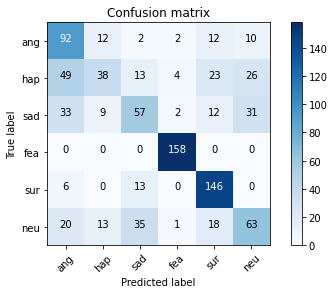

In [180]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


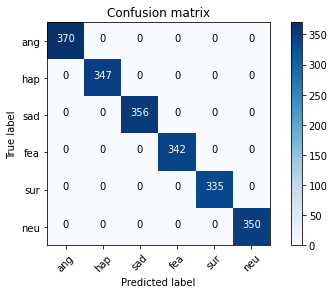

In [181]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=2)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.748
Test Set F-score =  0.735
Test Set Precision =  0.732
Test Set Recall =  0.744
Confusion matrix, without normalization
[[122   4   4   0   0   0]
 [ 21  77  19   0   5  31]
 [ 12  22  63   0   2  45]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  5  30  26   0   1  88]]


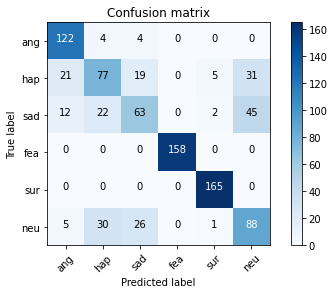

In [182]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


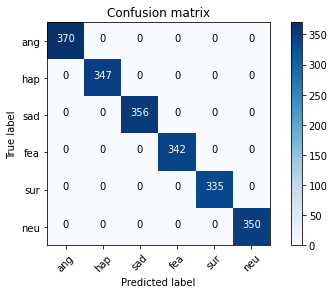

In [183]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=4)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.754
Test Set F-score =  0.743
Test Set Precision =  0.740
Test Set Recall =  0.750
Confusion matrix, without normalization
[[120   6   4   0   0   0]
 [ 19  85  18   0   4  27]
 [ 11  25  63   0   1  44]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  3  28  29   0   2  88]]


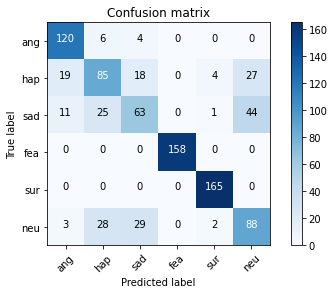

In [184]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


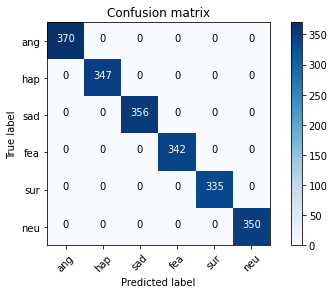

In [185]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=8)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.748
Test Set F-score =  0.734
Test Set Precision =  0.732
Test Set Recall =  0.744
Confusion matrix, without normalization
[[120   6   4   0   0   0]
 [ 24  81  17   0   5  26]
 [ 14  19  63   0   2  46]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  5  30  26   0   3  86]]


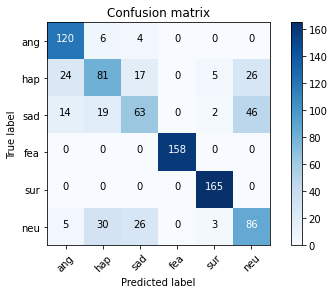

In [186]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.990
Test Set F-score =  0.990
Test Set Precision =  0.990
Test Set Recall =  0.990
Confusion matrix, without normalization
[[366   0   0   0   0   4]
 [  0 344   1   0   0   2]
 [  5   1 348   0   0   2]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  1   4   2   0   0 343]]


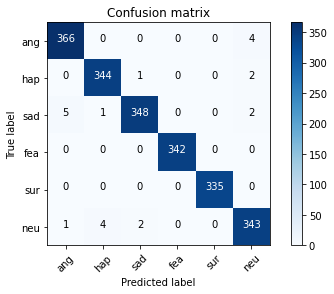

In [187]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=16)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.738
Test Set F-score =  0.724
Test Set Precision =  0.722
Test Set Recall =  0.733
Confusion matrix, without normalization
[[116   6   4   0   0   4]
 [ 25  76  17   0   7  28]
 [ 15  19  64   0   2  44]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  5  24  30   0   6  85]]


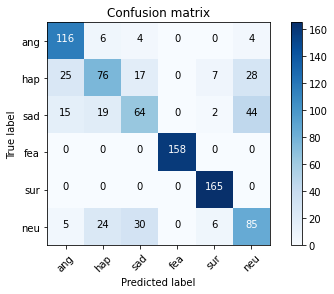

In [188]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.920
Test Set F-score =  0.921
Test Set Precision =  0.922
Test Set Recall =  0.921
Confusion matrix, without normalization
[[355   3   3   0   0   9]
 [  8 308  13   0   0  18]
 [ 30  17 286   0   3  20]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [ 12  14  16   0   1 307]]


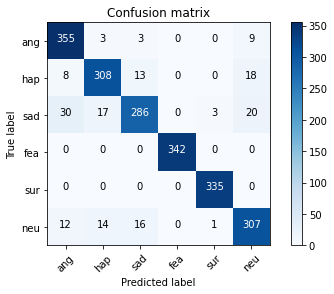

In [189]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=32)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.718
Test Set F-score =  0.700
Test Set Precision =  0.702
Test Set Recall =  0.713
Confusion matrix, without normalization
[[113   5   3   0   2   7]
 [ 33  68  17   0  10  25]
 [ 19  17  62   0   2  44]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [ 14  16  33   0   7  80]]


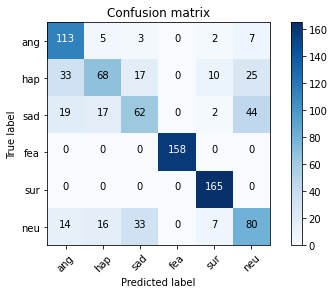

In [190]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.808
Test Set F-score =  0.805
Test Set Precision =  0.817
Test Set Recall =  0.809
Confusion matrix, without normalization
[[329   6   4   0   9  22]
 [ 74 195  17   0  18  43]
 [ 48  19 235   1   9  44]
 [  0   0   0 342   0   0]
 [  0   0  12   0 323   0]
 [ 24  16  28   0  10 272]]


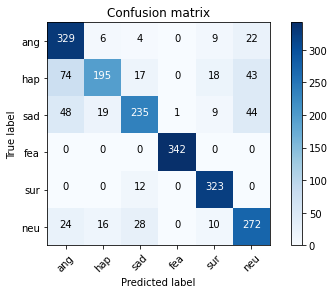

In [191]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=64)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.658
Test Set F-score =  0.637
Test Set Precision =  0.648
Test Set Recall =  0.653
Confusion matrix, without normalization
[[103   7   2   0   8  10]
 [ 46  53  11   0  14  29]
 [ 30   8  56   0   6  44]
 [  0   0   0 158   0   0]
 [  0   0  13   0 152   0]
 [ 18  15  36   0  11  70]]


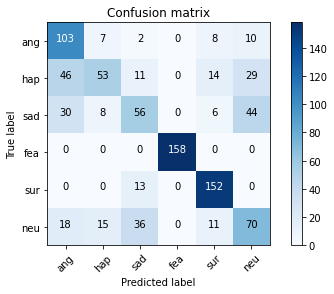

In [192]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.701
Test Set F-score =  0.688
Test Set Precision =  0.715
Test Set Recall =  0.703
Confusion matrix, without normalization
[[295   7   6   4  33  25]
 [118 117  27   3  49  33]
 [ 64  14 204   6  22  46]
 [  0   0   0 342   0   0]
 [ 12   0  12   0 311   0]
 [ 38  19  53   2  35 203]]


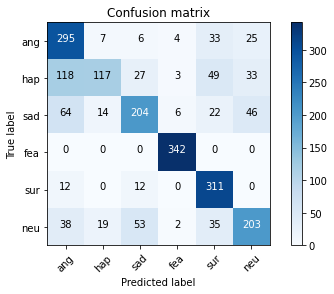

In [193]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=128)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.612
Test Set F-score =  0.583
Test Set Precision =  0.603
Test Set Recall =  0.607
Confusion matrix, without normalization
[[ 98   6   2   2  12  10]
 [ 51  37  16   3  22  24]
 [ 33   6  57   2  12  34]
 [  0   0   0 158   0   0]
 [  6   0  13   0 146   0]
 [ 24  11  40   0  20  55]]


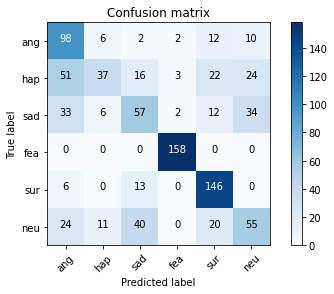

In [194]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


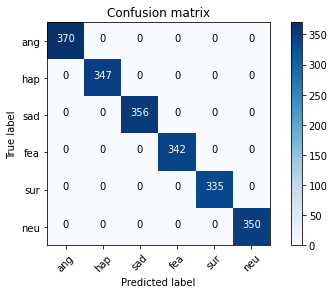

In [195]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=2)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.761
Test Set F-score =  0.750
Test Set Precision =  0.749
Test Set Recall =  0.758
Confusion matrix, without normalization
[[122   4   4   0   0   0]
 [ 19  81  20   0   4  29]
 [ 11  21  65   0   1  46]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  3  32  21   0   0  94]]


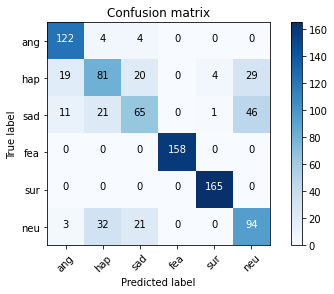

In [196]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


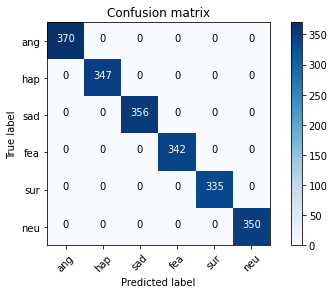

In [197]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=4)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.766
Test Set F-score =  0.755
Test Set Precision =  0.754
Test Set Recall =  0.762
Confusion matrix, without normalization
[[120   6   4   0   0   0]
 [ 13  86  19   0   4  31]
 [ 12  22  64   0   2  44]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  3  27  24   0   0  96]]


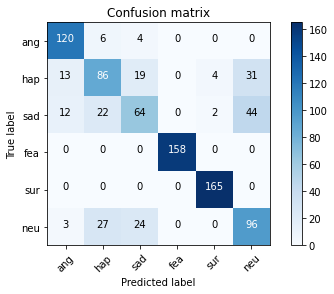

In [198]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


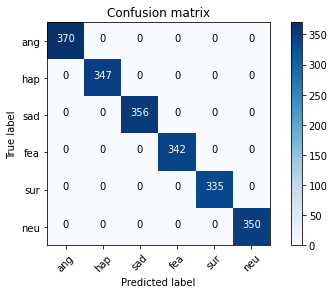

In [101]:
# RFC Training and Testing 10 sec Duration - For Best experiment
rfc_best_mfcc_10 = RandomForestClassifier(n_estimators=800, min_samples_split=4)
rfc_best_mfcc_10.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc_best_mfcc_10.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.763
Test Set F-score =  0.751
Test Set Precision =  0.749
Test Set Recall =  0.760
Confusion matrix, without normalization
[[124   2   4   0   0   0]
 [ 19  83  18   0   4  29]
 [ 11  24  64   0   2  43]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  4  28  23   0   2  93]]


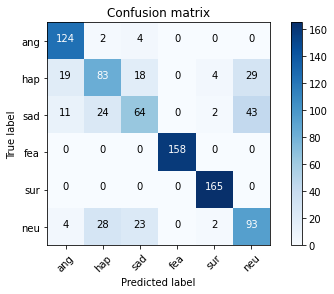

In [102]:
# Testing
pred_probs_mfcc_10 = rfc_best_mfcc_10.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs_mfcc_10)

In [103]:
target_names = ['ang', 'hap', 'sad', 'fea', 'sur', 'neu']
print(classification_report(y_onehot_test_10_mfcc.argmax(axis=1), pred_probs_mfcc_10.argmax(axis=1), target_names=target_names))

              precision    recall  f1-score   support

         ang       0.78      0.95      0.86       130
         hap       0.61      0.54      0.57       153
         sad       0.59      0.44      0.51       144
         fea       1.00      1.00      1.00       158
         sur       0.95      1.00      0.98       165
         neu       0.56      0.62      0.59       150

    accuracy                           0.76       900
   macro avg       0.75      0.76      0.75       900
weighted avg       0.75      0.76      0.76       900



In [104]:
# indices and labels of all correctly recognized
correct_indices = print_index(y_onehot_test_10_mfcc.argmax(axis=1), pred_probs_mfcc_10.argmax(axis=1))
correct_labels = print_labels(y_onehot_test_10_mfcc.argmax(axis=1), pred_probs_mfcc_10.argmax(axis=1))

len(correct_indices)

687

In [105]:
# indices of correctly recognized AND clipped
indices_of_clipped_recognized = []
for i in range(len(X_test_10_mfcc)):
    for j in range(len(correct_indices)):
        if(i == correct_indices[j]):
            if(i in x_clipped):
                indices_of_clipped_recognized.append(i)

label_of_clipped_recognized = []
# we get the label of correctly recognized clipped audios
for i in range(len(y_onehot_test_10_mfcc.argmax(axis=1))):
    if(i in indices_of_clipped_recognized):
        label_of_clipped_recognized.append((y_onehot_test_10_mfcc.argmax(axis=1)[i]))

In [106]:
dic_val_clipped = count_label(label_of_clipped_recognized)

dic_val_clipped

{'ang': 8, 'hap': 2, 'sad': 5, 'fea': 0, 'sur': 7, 'neu': 5}

<BarContainer object of 6 artists>

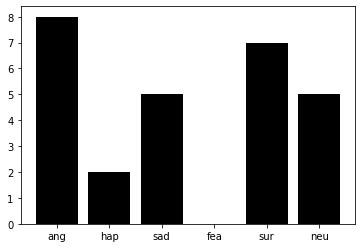

In [107]:
plt.bar(list(dic_val_clipped.keys()), dic_val_clipped.values(), color='black')

In [108]:
clipped_ratio = len(indices_of_clipped_recognized) / len(x_clipped)

clipped_ratio

0.675

In [109]:
# we get the indices of correctly recognized un-clipped audios
indices_of_unclipped_recognized = []
for i in range(len(X_test_10_mfcc)):
    for j in range(len(correct_indices)):
        if(i == correct_indices[j]):
            if(i not in x_clipped):
                indices_of_unclipped_recognized.append(i)

len(indices_of_unclipped_recognized)

660

In [110]:
label_of_unclipped_recognized = []
# we get the label of correctly recognized unclipped audios
for i in range(len(y_onehot_test_10_mfcc.argmax(axis=1))):
    if(i in indices_of_unclipped_recognized):
        label_of_unclipped_recognized.append((y_onehot_test_10_mfcc.argmax(axis=1)[i]))

dic_val_unclipped = count_label(label_of_unclipped_recognized)

<BarContainer object of 6 artists>

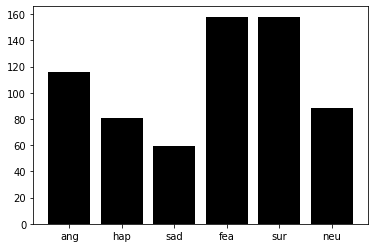

In [111]:
plt.bar(list(dic_val_unclipped.keys()), dic_val_unclipped.values(), color='black')

In [112]:
unclipped_ratio = len(indices_of_unclipped_recognized) / len(x_unclipped)

unclipped_ratio

0.7674418604651163

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


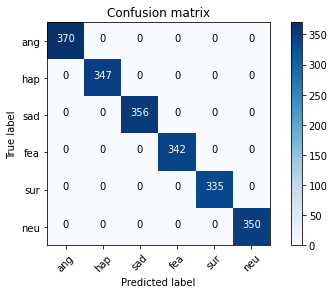

In [199]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=8)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.757
Test Set F-score =  0.744
Test Set Precision =  0.741
Test Set Recall =  0.754
Confusion matrix, without normalization
[[122   4   4   0   0   0]
 [ 25  76  18   0   6  28]
 [ 12  22  70   0   2  38]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  5  27  25   0   3  90]]


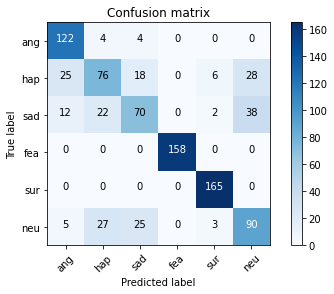

In [200]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.986
Test Set F-score =  0.986
Test Set Precision =  0.987
Test Set Recall =  0.986
Confusion matrix, without normalization
[[366   0   0   0   0   4]
 [  0 345   0   0   0   2]
 [  9   2 341   0   0   4]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  2   4   2   0   0 342]]


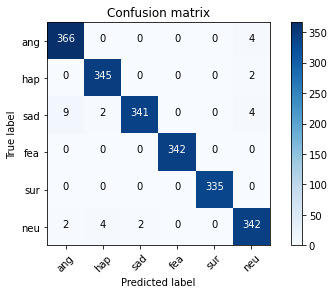

In [201]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=16)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.736
Test Set F-score =  0.721
Test Set Precision =  0.720
Test Set Recall =  0.731
Confusion matrix, without normalization
[[116   6   4   0   0   4]
 [ 28  75  13   0   8  29]
 [ 16  19  64   0   2  43]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  7  24  31   0   4  84]]


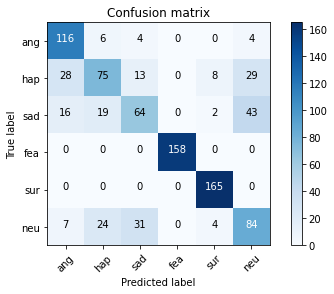

In [202]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.914
Test Set F-score =  0.914
Test Set Precision =  0.916
Test Set Recall =  0.915
Confusion matrix, without normalization
[[352   4   3   0   0  11]
 [ 11 302  13   0   1  20]
 [ 30  18 281   0   2  25]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [ 15  11  16   0   1 307]]


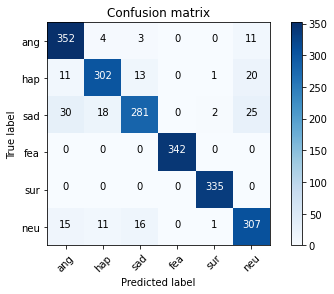

In [203]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=32)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.721
Test Set F-score =  0.704
Test Set Precision =  0.706
Test Set Recall =  0.717
Confusion matrix, without normalization
[[114   6   3   0   0   7]
 [ 37  67  11   0   9  29]
 [ 17  17  64   0   2  44]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  9  19  34   0   7  81]]


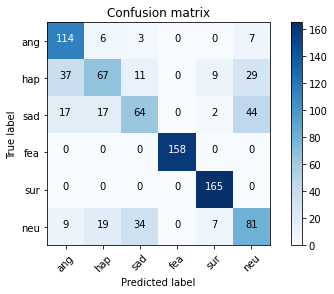

In [204]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.804
Test Set F-score =  0.802
Test Set Precision =  0.812
Test Set Recall =  0.806
Confusion matrix, without normalization
[[328   6   6   0   5  25]
 [ 73 201  21   0  16  36]
 [ 49  20 229   1   9  48]
 [  0   0   0 342   0   0]
 [  0   0   8   0 327   0]
 [ 25  19  33   0  11 262]]


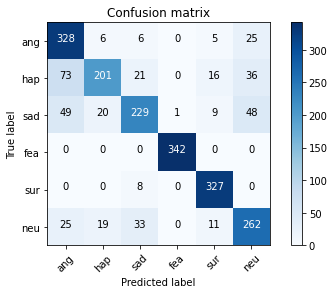

In [205]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=64)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.670
Test Set F-score =  0.649
Test Set Precision =  0.658
Test Set Recall =  0.664
Confusion matrix, without normalization
[[103   7   2   0   7  11]
 [ 44  56  14   0  12  27]
 [ 27  12  58   0   6  41]
 [  0   0   0 158   0   0]
 [  0   0   8   0 157   0]
 [ 17  13  36   0  13  71]]


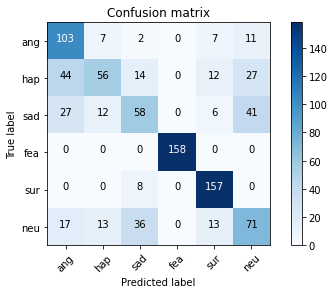

In [206]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.697
Test Set F-score =  0.684
Test Set Precision =  0.710
Test Set Recall =  0.698
Confusion matrix, without normalization
[[294  11   6   2  30  27]
 [116 117  23   3  53  35]
 [ 65  13 197   7  26  48]
 [  0   0   0 342   0   0]
 [ 12   0  12   0 311   0]
 [ 37  19  50   2  40 202]]


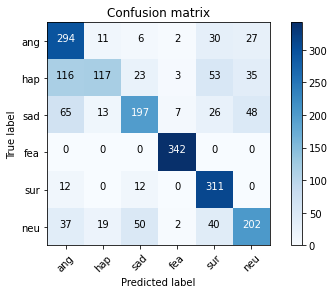

In [207]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=128)
rfc.fit(X_train_10_mfcc, y_train_10_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_10_mfcc)
print('Training Results')
display_results(y_train_10_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.619
Test Set F-score =  0.589
Test Set Precision =  0.613
Test Set Recall =  0.614
Confusion matrix, without normalization
[[ 97   6   2   2  13  10]
 [ 51  36  16   3  24  23]
 [ 33   6  56   1  16  32]
 [  0   0   0 158   0   0]
 [  6   0  13   0 146   0]
 [ 22   9  34   1  20  64]]


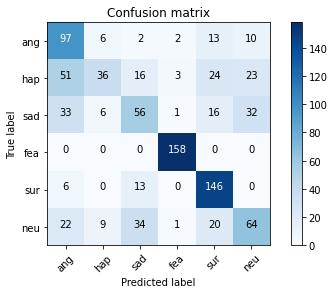

In [208]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mfcc)
print('Testing Results')
display_results(y_test_10_mfcc, pred_probs)

#### 30 seconds

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


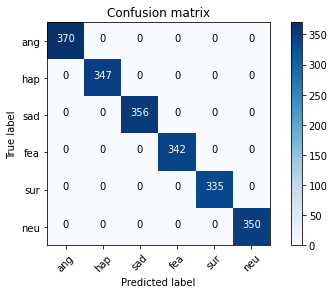

In [209]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=2)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.750
Test Set F-score =  0.737
Test Set Precision =  0.734
Test Set Recall =  0.747
Confusion matrix, without normalization
[[124   2   4   0   0   0]
 [ 19  75  18   0   6  35]
 [ 13  25  65   0   1  40]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  4  30  26   0   2  88]]


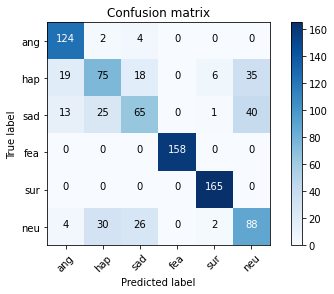

In [210]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


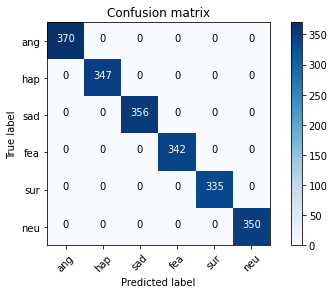

In [211]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=4)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.743
Test Set F-score =  0.731
Test Set Precision =  0.727
Test Set Recall =  0.739
Confusion matrix, without normalization
[[120   8   2   0   0   0]
 [ 15  81  22   0   7  28]
 [ 16  18  64   0   1  45]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  7  28  33   0   1  81]]


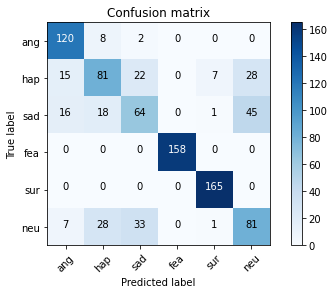

In [212]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


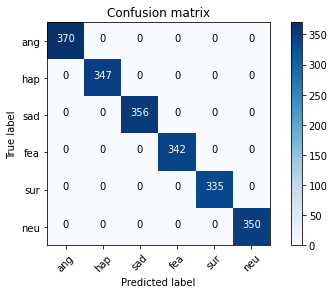

In [213]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=8)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.728
Test Set F-score =  0.714
Test Set Precision =  0.710
Test Set Recall =  0.724
Confusion matrix, without normalization
[[120   6   4   0   0   0]
 [ 19  74  21   0   7  32]
 [ 12  24  58   0   2  48]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  5  33  30   0   2  80]]


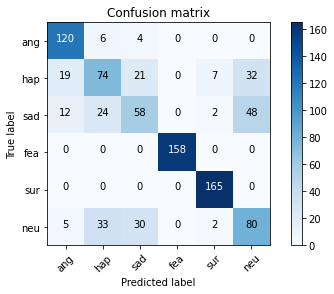

In [214]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.979
Test Set F-score =  0.979
Test Set Precision =  0.979
Test Set Recall =  0.979
Confusion matrix, without normalization
[[365   1   0   0   0   4]
 [  0 341   3   0   0   3]
 [ 10   5 334   0   0   7]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  3   4   4   0   0 339]]


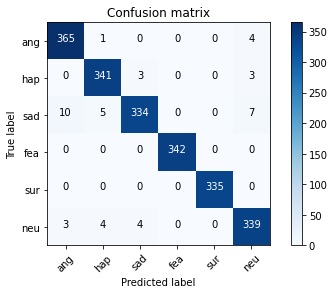

In [215]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=16)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.734
Test Set F-score =  0.721
Test Set Precision =  0.718
Test Set Recall =  0.730
Confusion matrix, without normalization
[[115   7   4   0   0   4]
 [ 27  75  15   0   8  28]
 [ 11  22  69   0   3  39]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  8  29  30   0   4  79]]


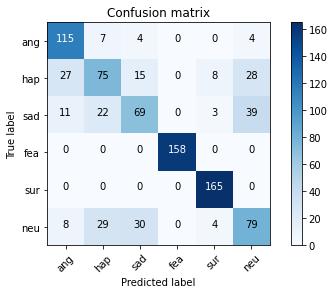

In [216]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.912
Test Set F-score =  0.913
Test Set Precision =  0.914
Test Set Recall =  0.913
Confusion matrix, without normalization
[[353   3   4   0   0  10]
 [ 11 301  12   0   1  22]
 [ 28  21 279   0   2  26]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [ 13  13  17   0   1 306]]


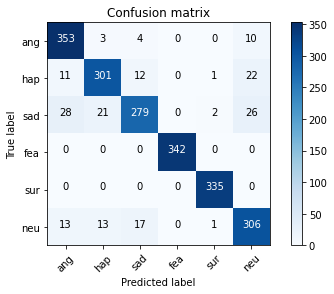

In [217]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=32)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.702
Test Set F-score =  0.684
Test Set Precision =  0.685
Test Set Recall =  0.697
Confusion matrix, without normalization
[[111   5   4   0   0  10]
 [ 34  65  17   0   8  29]
 [ 20  16  58   0   3  47]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [ 12  23  33   0   7  75]]


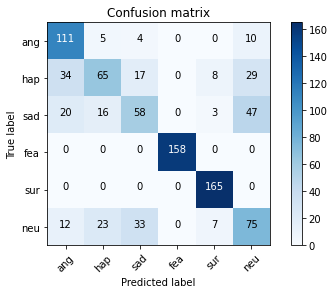

In [218]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.798
Test Set F-score =  0.795
Test Set Precision =  0.802
Test Set Recall =  0.799
Confusion matrix, without normalization
[[328   5   7   0   6  24]
 [ 72 196  32   0  18  29]
 [ 49  23 231   1   8  44]
 [  0   0   0 342   0   0]
 [  0   0  12   0 323   0]
 [ 23  24  36   0  12 255]]


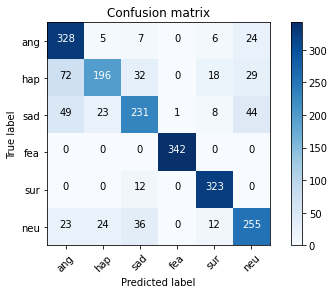

In [219]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=64)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.666
Test Set F-score =  0.647
Test Set Precision =  0.651
Test Set Recall =  0.660
Confusion matrix, without normalization
[[101  10   3   0   6  10]
 [ 43  54  19   0  11  26]
 [ 24  14  65   0   6  35]
 [  0   0   0 158   0   0]
 [  0   0  13   0 152   0]
 [ 20  16  34   0  11  69]]


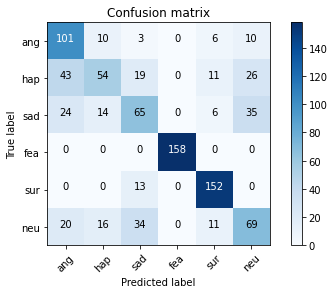

In [220]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.698
Test Set F-score =  0.685
Test Set Precision =  0.706
Test Set Recall =  0.700
Confusion matrix, without normalization
[[295   7   6   1  32  29]
 [115 115  25   4  53  35]
 [ 59  20 191   6  27  53]
 [  0   0   0 342   0   0]
 [ 12   5   8   0 310   0]
 [ 34  22  44   2  35 213]]


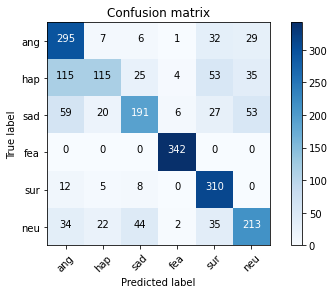

In [221]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=128)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.626
Test Set F-score =  0.599
Test Set Precision =  0.619
Test Set Recall =  0.620
Confusion matrix, without normalization
[[ 98   6   2   1  13  10]
 [ 50  40  15   1  22  25]
 [ 33   4  60   1  12  34]
 [  0   0   0 158   0   0]
 [  5   4   9   0 147   0]
 [ 24  10  36   1  19  60]]


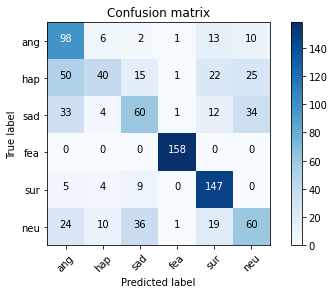

In [222]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


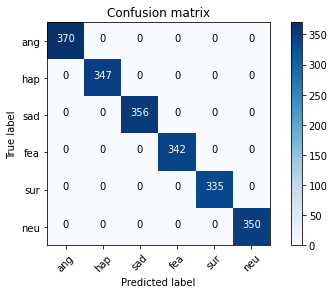

In [223]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=2)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.734
Test Set F-score =  0.722
Test Set Precision =  0.717
Test Set Recall =  0.731
Confusion matrix, without normalization
[[122   6   2   0   0   0]
 [ 20  77  22   0   4  30]
 [ 12  24  65   0   1  42]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  5  34  35   0   2  74]]


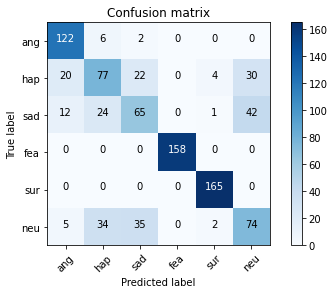

In [224]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


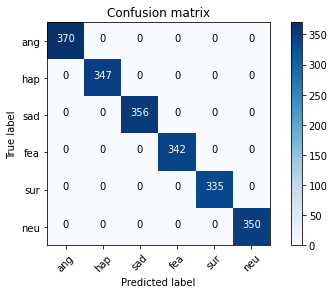

In [225]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=4)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.752
Test Set F-score =  0.741
Test Set Precision =  0.739
Test Set Recall =  0.749
Confusion matrix, without normalization
[[120   6   4   0   0   0]
 [ 18  80  20   0   5  30]
 [ 13  17  68   0   0  46]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  6  27  30   0   1  86]]


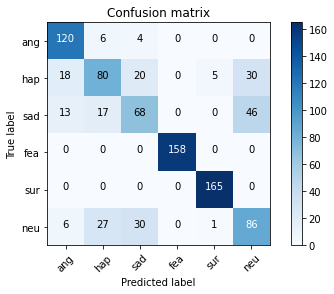

In [226]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


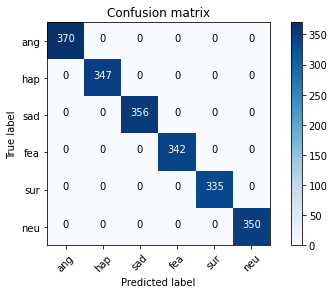

In [227]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=8)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.752
Test Set F-score =  0.739
Test Set Precision =  0.735
Test Set Recall =  0.749
Confusion matrix, without normalization
[[124   2   4   0   0   0]
 [ 20  80  19   0   7  27]
 [ 11  26  63   0   2  42]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  5  26  29   0   3  87]]


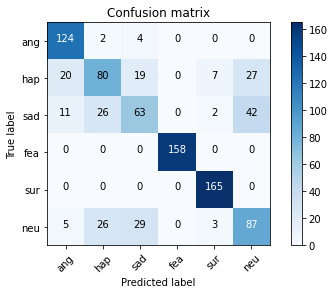

In [228]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.983
Test Set F-score =  0.984
Test Set Precision =  0.984
Test Set Recall =  0.984
Confusion matrix, without normalization
[[365   1   0   0   0   4]
 [  0 341   2   0   0   4]
 [ 10   2 340   0   1   3]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  3   4   1   0   0 342]]


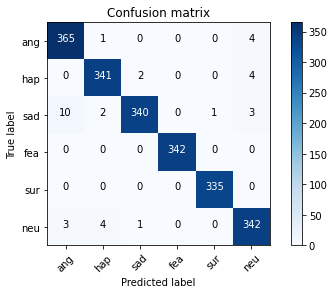

In [229]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=16)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.728
Test Set F-score =  0.714
Test Set Precision =  0.711
Test Set Recall =  0.723
Confusion matrix, without normalization
[[112  10   4   0   0   4]
 [ 25  76  19   0   8  25]
 [ 14  20  63   0   2  45]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  6  29  31   0   3  81]]


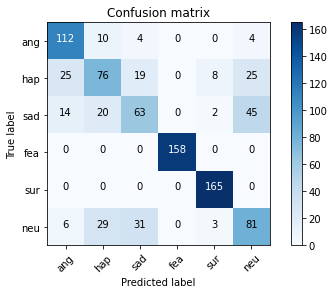

In [230]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.912
Test Set F-score =  0.912
Test Set Precision =  0.914
Test Set Recall =  0.913
Confusion matrix, without normalization
[[357   3   2   0   0   8]
 [ 11 299  12   0   2  23]
 [ 28  22 277   0   3  26]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [ 14  16  14   0   1 305]]


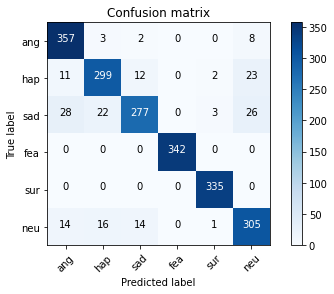

In [231]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=32)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.712
Test Set F-score =  0.694
Test Set Precision =  0.692
Test Set Recall =  0.708
Confusion matrix, without normalization
[[116   6   2   0   0   6]
 [ 33  63  21   0  10  26]
 [ 18  18  62   0   4  42]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [ 10  21  37   0   5  77]]


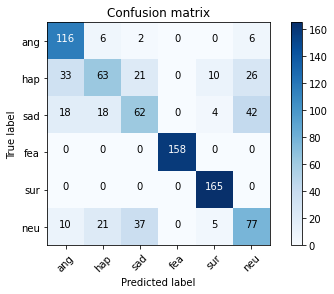

In [232]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.805
Test Set F-score =  0.802
Test Set Precision =  0.812
Test Set Recall =  0.807
Confusion matrix, without normalization
[[321   9   6   0   5  29]
 [ 71 193  21   0  20  42]
 [ 48  25 229   1   9  44]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [ 24  17  28   0  10 271]]


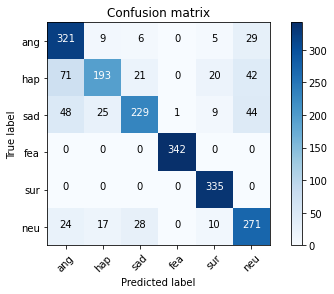

In [233]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=64)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.667
Test Set F-score =  0.641
Test Set Precision =  0.648
Test Set Recall =  0.660
Confusion matrix, without normalization
[[ 99   8   4   0   7  12]
 [ 43  47  16   0  16  31]
 [ 25  11  56   0   7  45]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [ 16  17  32   0  10  75]]


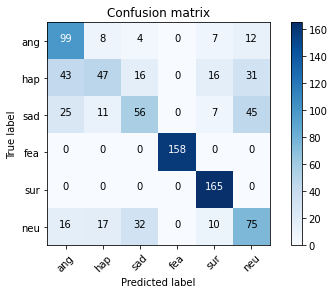

In [234]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.697
Test Set F-score =  0.685
Test Set Precision =  0.707
Test Set Recall =  0.699
Confusion matrix, without normalization
[[298  10   9   1  27  25]
 [115 122  24   3  46  37]
 [ 61  15 198   6  24  52]
 [  0   0   0 342   0   0]
 [ 12   0  16   0 307   0]
 [ 38  22  51   3  39 197]]


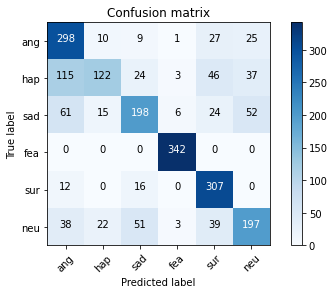

In [235]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=128)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.616
Test Set F-score =  0.589
Test Set Precision =  0.600
Test Set Recall =  0.611
Confusion matrix, without normalization
[[ 96   9   4   1  12   8]
 [ 53  34  16   1  23  26]
 [ 30  10  59   0  11  34]
 [  0   0   0 158   0   0]
 [  6   0  17   0 142   0]
 [ 19  13  34   1  18  65]]


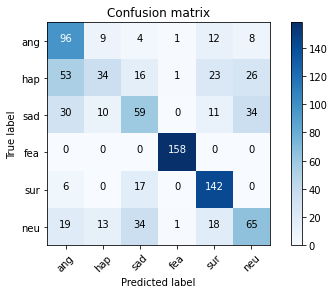

In [236]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


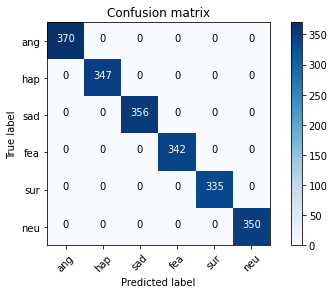

In [237]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=2)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.749
Test Set F-score =  0.738
Test Set Precision =  0.735
Test Set Recall =  0.744
Confusion matrix, without normalization
[[116  10   4   0   0   0]
 [ 16  85  20   0   5  27]
 [ 11  24  63   0   2  44]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  4  27  29   0   3  87]]


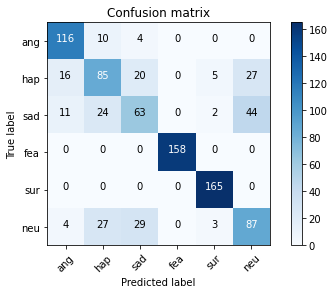

In [238]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


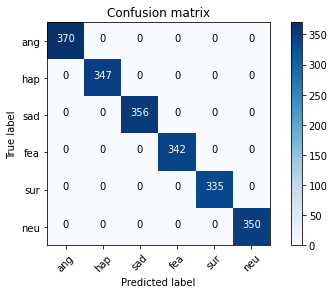

In [239]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=4)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.756
Test Set F-score =  0.742
Test Set Precision =  0.741
Test Set Recall =  0.752
Confusion matrix, without normalization
[[120   6   4   0   0   0]
 [ 20  82  16   0   8  27]
 [ 12  21  61   0   2  48]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  5  25  25   0   1  94]]


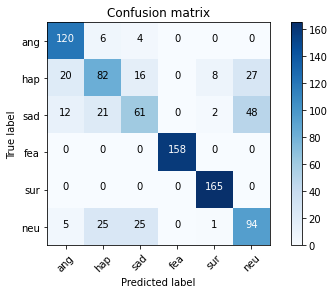

In [240]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


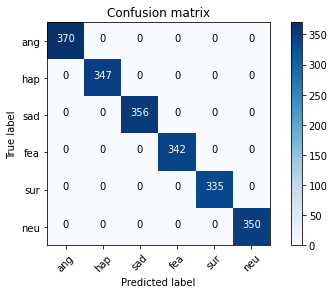

In [113]:
# RFC Training and Testing 30 sec Duration - For Best Experiment
rfc_best_mfcc_30 = RandomForestClassifier(n_estimators=400, min_samples_split=4)
rfc_best_mfcc_30.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc_best_mfcc_30.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.756
Test Set F-score =  0.745
Test Set Precision =  0.742
Test Set Recall =  0.752
Confusion matrix, without normalization
[[122   6   2   0   0   0]
 [ 16  82  23   0   4  28]
 [  8  26  65   0   1  44]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  3  27  31   0   1  88]]


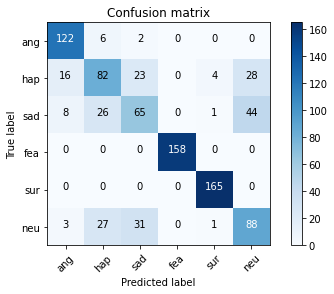

In [114]:
# Testing
pred_probs_mfcc_30 = rfc_best_mfcc_30.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs_mfcc_30)

In [115]:
target_names = ['ang', 'hap', 'sad', 'fea', 'sur', 'neu']
print(classification_report(y_onehot_test_10_mfcc.argmax(axis=1), pred_probs_mfcc_30.argmax(axis=1), target_names=target_names))

              precision    recall  f1-score   support

         ang       0.82      0.94      0.87       130
         hap       0.58      0.54      0.56       153
         sad       0.54      0.45      0.49       144
         fea       1.00      1.00      1.00       158
         sur       0.96      1.00      0.98       165
         neu       0.55      0.59      0.57       150

    accuracy                           0.76       900
   macro avg       0.74      0.75      0.75       900
weighted avg       0.75      0.76      0.75       900



Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  1   0   0   0   0 349]]


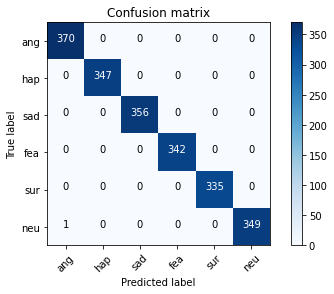

In [480]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=8)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.752
Test Set F-score =  0.740
Test Set Precision =  0.737
Test Set Recall =  0.749
Confusion matrix, without normalization
[[122   4   4   0   0   0]
 [ 19  83  17   0   5  29]
 [ 13  25  64   0   2  40]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  3  32  27   0   3  85]]


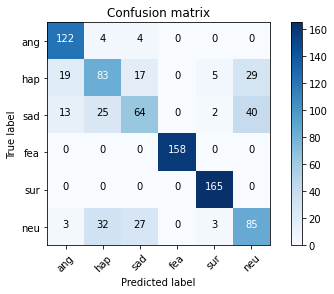

In [242]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.987
Test Set F-score =  0.987
Test Set Precision =  0.987
Test Set Recall =  0.987
Confusion matrix, without normalization
[[366   0   0   0   0   4]
 [  0 343   1   0   0   3]
 [  5   1 347   0   0   3]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  2   4   4   0   0 340]]


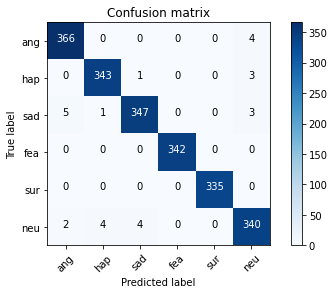

In [243]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=16)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.732
Test Set F-score =  0.718
Test Set Precision =  0.714
Test Set Recall =  0.728
Confusion matrix, without normalization
[[118   4   4   0   0   4]
 [ 26  78  16   0   8  25]
 [ 11  23  60   0   2  48]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  7  27  33   0   3  80]]


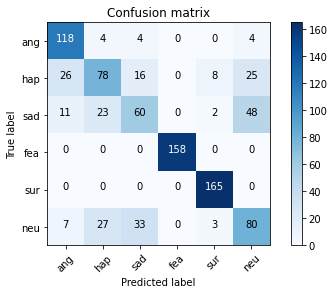

In [244]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.918
Test Set F-score =  0.918
Test Set Precision =  0.920
Test Set Recall =  0.918
Confusion matrix, without normalization
[[356   3   2   0   0   9]
 [  9 303  13   0   2  20]
 [ 29  15 283   0   3  26]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [ 14  13  14   0   1 308]]


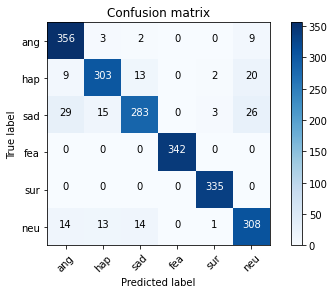

In [245]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=32)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.717
Test Set F-score =  0.699
Test Set Precision =  0.699
Test Set Recall =  0.712
Confusion matrix, without normalization
[[112   7   2   0   2   7]
 [ 36  64  18   0   9  26]
 [ 17  18  64   0   2  43]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [ 11  21  31   0   5  82]]


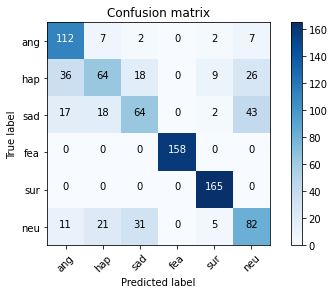

In [246]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.804
Test Set F-score =  0.802
Test Set Precision =  0.811
Test Set Recall =  0.806
Confusion matrix, without normalization
[[327   6   5   0   8  24]
 [ 73 199  23   0  14  38]
 [ 46  27 228   0   8  47]
 [  0   0   0 342   0   0]
 [  0   0   4   0 331   0]
 [ 28  21  28   0  11 262]]


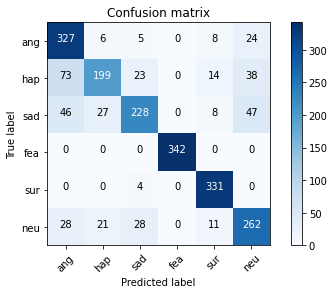

In [247]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=64)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.674
Test Set F-score =  0.652
Test Set Precision =  0.658
Test Set Recall =  0.669
Confusion matrix, without normalization
[[104   7   3   0   6  10]
 [ 45  52  16   0  13  27]
 [ 26  13  60   0   7  38]
 [  0   0   0 158   0   0]
 [  0   0   4   0 161   0]
 [ 17  16  34   0  11  72]]


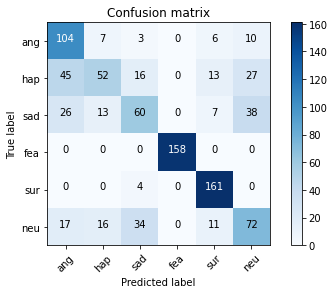

In [248]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.698
Test Set F-score =  0.685
Test Set Precision =  0.711
Test Set Recall =  0.700
Confusion matrix, without normalization
[[291   7   5   3  31  33]
 [109 122  24   4  52  36]
 [ 60  16 194   6  29  51]
 [  0   0   0 342   0   0]
 [ 12   0  12   0 311   0]
 [ 38  19  44   3  41 205]]


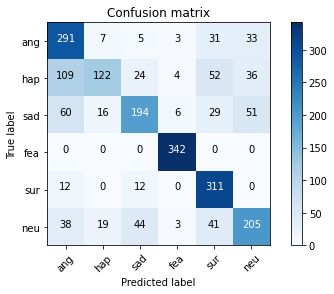

In [249]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=128)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.622
Test Set F-score =  0.595
Test Set Precision =  0.616
Test Set Recall =  0.617
Confusion matrix, without normalization
[[ 96   8   4   1  11  10]
 [ 54  37  17   0  21  24]
 [ 28   6  60   0  15  35]
 [  0   0   0 158   0   0]
 [  6   0  13   0 146   0]
 [ 23  10  33   0  21  63]]


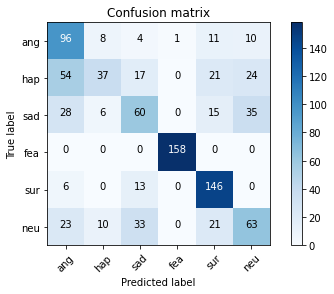

In [250]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


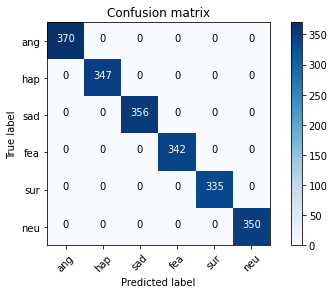

In [251]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=2)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.753
Test Set F-score =  0.741
Test Set Precision =  0.741
Test Set Recall =  0.749
Confusion matrix, without normalization
[[120   6   4   0   0   0]
 [ 18  82  18   0   3  32]
 [ 13  18  63   0   2  48]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  6  30  23   0   1  90]]


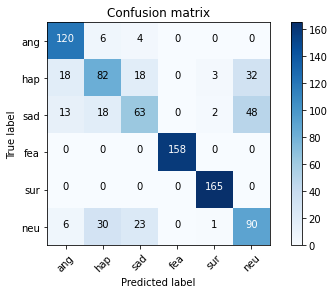

In [252]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


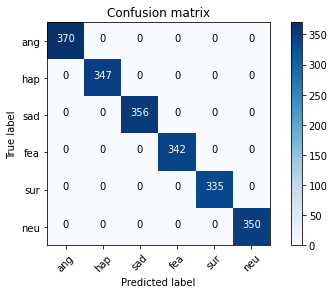

In [253]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=4)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.752
Test Set F-score =  0.740
Test Set Precision =  0.737
Test Set Recall =  0.749
Confusion matrix, without normalization
[[122   4   4   0   0   0]
 [ 17  84  23   0   4  25]
 [ 11  20  63   0   2  48]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  4  31  27   0   3  85]]


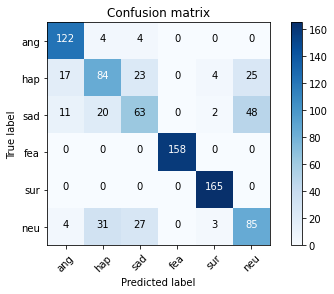

In [254]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


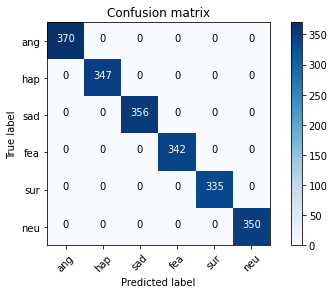

In [255]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=8)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.753
Test Set F-score =  0.741
Test Set Precision =  0.738
Test Set Recall =  0.750
Confusion matrix, without normalization
[[122   4   4   0   0   0]
 [ 17  84  18   0   5  29]
 [ 13  20  62   0   2  47]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  4  30  26   0   3  87]]


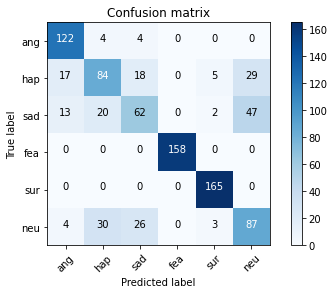

In [256]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.988
Test Set F-score =  0.988
Test Set Precision =  0.988
Test Set Recall =  0.988
Confusion matrix, without normalization
[[367   0   0   0   0   3]
 [  0 344   0   0   0   3]
 [  7   1 345   0   0   3]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  2   4   3   0   0 341]]


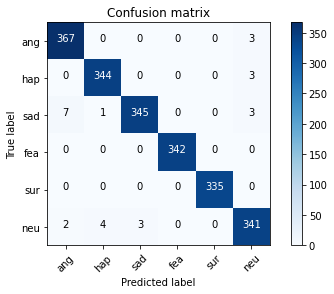

In [257]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=16)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.736
Test Set F-score =  0.720
Test Set Precision =  0.718
Test Set Recall =  0.732
Confusion matrix, without normalization
[[121   2   4   0   0   3]
 [ 27  70  19   0   8  29]
 [ 14  21  64   0   2  43]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  6  26  29   0   5  84]]


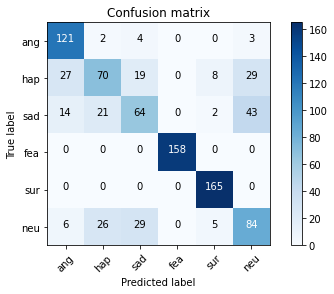

In [258]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.915
Test Set F-score =  0.915
Test Set Precision =  0.918
Test Set Recall =  0.916
Confusion matrix, without normalization
[[354   3   3   0   0  10]
 [ 12 302  11   0   0  22]
 [ 30  16 282   0   2  26]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [ 16  14  13   0   1 306]]


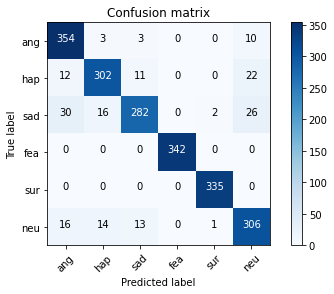

In [259]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=32)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.712
Test Set F-score =  0.694
Test Set Precision =  0.698
Test Set Recall =  0.707
Confusion matrix, without normalization
[[110   7   5   0   0   8]
 [ 38  65  13   0   9  28]
 [ 20  15  59   0   2  48]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [ 12  19  30   0   5  84]]


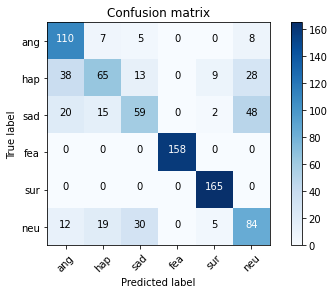

In [260]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.812
Test Set F-score =  0.810
Test Set Precision =  0.818
Test Set Recall =  0.814
Confusion matrix, without normalization
[[333   6   7   0   4  20]
 [ 68 205  21   0  16  37]
 [ 43  26 235   0   9  43]
 [  0   0   0 342   0   0]
 [  0   0   8   0 327   0]
 [ 26  19  32   0   9 264]]


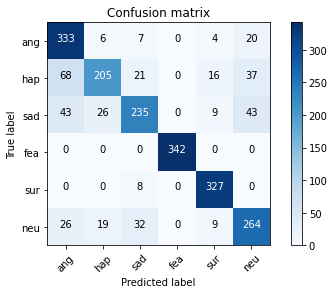

In [261]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=64)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.672
Test Set F-score =  0.652
Test Set Precision =  0.658
Test Set Recall =  0.667
Confusion matrix, without normalization
[[104   7   3   0   6  10]
 [ 44  55  15   0  13  26]
 [ 23  11  58   0   8  44]
 [  0   0   0 158   0   0]
 [  0   0   9   0 156   0]
 [ 15  17  34   0  10  74]]


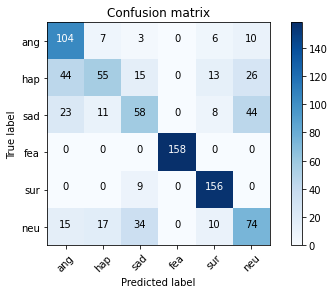

In [262]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

Training Results
6
Test Set Accuracy =  0.700
Test Set F-score =  0.689
Test Set Precision =  0.710
Test Set Recall =  0.701
Confusion matrix, without normalization
[[289  12   8   2  32  27]
 [111 125  27   3  45  36]
 [ 60  16 202   6  25  47]
 [  0   0   0 342   0   0]
 [ 17   0  12   0 306   0]
 [ 35  20  50   2  38 205]]


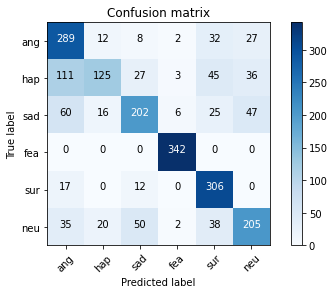

In [263]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=128)
rfc.fit(X_train_30_mfcc, y_train_30_mfcc)

# Training
pred_probs = rfc.predict_proba(X_train_30_mfcc)
print('Training Results')
display_results(y_train_30_mfcc, pred_probs)

Testing Results
6
Test Set Accuracy =  0.616
Test Set F-score =  0.588
Test Set Precision =  0.607
Test Set Recall =  0.610
Confusion matrix, without normalization
[[ 94   9   2   2  13  10]
 [ 51  36  14   3  21  28]
 [ 30   5  60   2  15  32]
 [  0   0   0 158   0   0]
 [ 10   0  13   0 142   0]
 [ 22  11  33   1  19  64]]


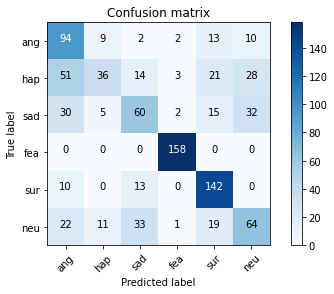

In [264]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mfcc)
print('Testing Results')
display_results(y_test_30_mfcc, pred_probs)

### XGBoost Classifier

#### 10 seconds

[10:37:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


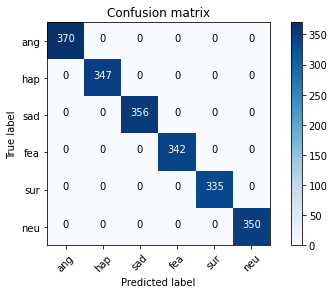

In [510]:
# XGB Sahu 10 seconds - For Best Experiment
xgb_model_mfcc_10 = xgb.XGBClassifier(max_depth=7, learning_rate=0.008, objective='multi:softprob',
                              n_estimators=1200, subsample=0.8, num_class=len(emotion_dict),
                              booster='gbtree', n_jobs=4)
xgb_model_mfcc_10.fit(X_train_10_mfcc, y_train_10_mfcc)

print('Training')
pred_probs = xgb_model_mfcc_10.predict_proba(X_train_10_mfcc)
display_results(y_train_10_mfcc, pred_probs)

Testing
6
Test Set Accuracy =  0.758
Test Set F-score =  0.745
Test Set Precision =  0.743
Test Set Recall =  0.754
Confusion matrix, without normalization
[[120   6   4   0   0   0]
 [ 21  83  19   0   5  25]
 [ 15  18  65   0   1  45]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  4  26  27   0   2  91]]


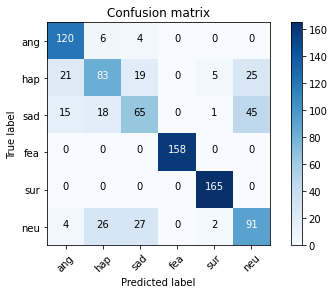

In [519]:
print('Testing')
pred_probs_xgb_mfcc_10 = xgb_model_mfcc_10.predict_proba(X_test_10_mfcc)
display_results(y_test_10_mfcc, pred_probs_xgb_mfcc_10)

In [521]:
target_names = ['ang', 'hap', 'sad', 'fea', 'sur', 'neu']
print(classification_report(y_onehot_test_10_mfcc.argmax(axis=1), pred_probs_xgb_mfcc_10.argmax(axis=1), target_names=target_names))

              precision    recall  f1-score   support

         ang       0.75      0.92      0.83       130
         hap       0.62      0.54      0.58       153
         sad       0.57      0.45      0.50       144
         fea       1.00      1.00      1.00       158
         sur       0.95      1.00      0.98       165
         neu       0.57      0.61      0.59       150

    accuracy                           0.76       900
   macro avg       0.74      0.75      0.75       900
weighted avg       0.75      0.76      0.75       900



In [522]:
# indices and labels of all correctly recognized
correct_indices = print_index(y_onehot_test_10_mfcc.argmax(axis=1), pred_probs_xgb_mfcc_10.argmax(axis=1))
correct_labels = print_labels(y_onehot_test_10_mfcc.argmax(axis=1), pred_probs_xgb_mfcc_10.argmax(axis=1))

len(correct_indices)

682

In [523]:
# indices of correctly recognized AND clipped
indices_of_clipped_recognized = []
for i in range(len(X_test_10_mfcc)):
    for j in range(len(correct_indices)):
        if(i == correct_indices[j]):
            if(i in x_clipped):
                indices_of_clipped_recognized.append(i)

label_of_clipped_recognized = []
# we get the label of correctly recognized clipped audios
for i in range(len(y_onehot_test_10_mfcc.argmax(axis=1))):
    if(i in indices_of_clipped_recognized):
        label_of_clipped_recognized.append((y_onehot_test_10_mfcc.argmax(axis=1)[i]))


In [524]:
dic_val_clipped = count_label(label_of_clipped_recognized)

dic_val_clipped

{'ang': 8, 'hap': 4, 'sad': 4, 'fea': 0, 'sur': 7, 'neu': 5}

<BarContainer object of 6 artists>

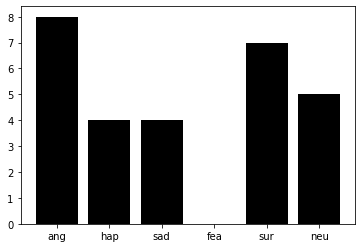

In [525]:
plt.bar(list(dic_val_clipped.keys()), dic_val_clipped.values(), color='black')

In [526]:
clipped_ratio = len(indices_of_clipped_recognized) / len(x_clipped)

clipped_ratio

0.7

In [527]:
# we get the indices of correctly recognized un-clipped audios
indices_of_unclipped_recognized = []
for i in range(len(X_test_10_mfcc)):
    for j in range(len(correct_indices)):
        if(i == correct_indices[j]):
            if(i not in x_clipped):
                indices_of_unclipped_recognized.append(i)

len(indices_of_unclipped_recognized)

654

In [528]:
label_of_unclipped_recognized = []
# we get the label of correctly recognized unclipped audios
for i in range(len(y_onehot_test_10_mfcc.argmax(axis=1))):
    if(i in indices_of_unclipped_recognized):
        label_of_unclipped_recognized.append((y_onehot_test_10_mfcc.argmax(axis=1)[i]))

dic_val_unclipped = count_label(label_of_unclipped_recognized)

<BarContainer object of 6 artists>

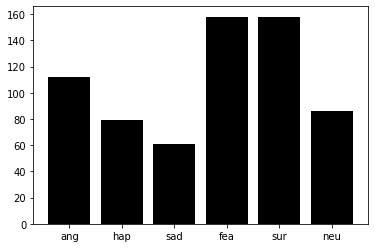

In [529]:
plt.bar(list(dic_val_unclipped.keys()), dic_val_unclipped.values(), color='black')

In [530]:
unclipped_ratio = len(indices_of_unclipped_recognized) / len(x_unclipped)

In [531]:
unclipped_ratio

0.7604651162790698

/home/jupyter-reynaldo_delimajr/.local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


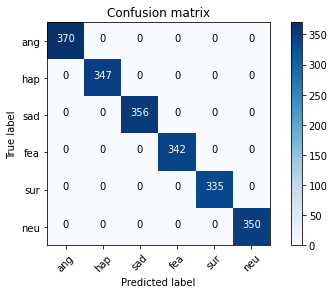

In [512]:
# XGB Sahu 30 seconds - For Best Experiment
xgb_model_mfcc_30 = xgb.XGBClassifier(max_depth=7, learning_rate=0.008, objective='multi:softprob',
                              n_estimators=1200, subsample=0.8, num_class=len(emotion_dict),
                              booster='gbtree', n_jobs=4)
xgb_model_mfcc_30.fit(X_train_30_mfcc, y_train_30_mfcc)

print('Training')
pred_probs = xgb_model_mfcc_30.predict_proba(X_train_30_mfcc)
display_results(y_train_30_mfcc, pred_probs)

Testing
6
Test Set Accuracy =  0.752
Test Set F-score =  0.741
Test Set Precision =  0.738
Test Set Recall =  0.748
Confusion matrix, without normalization
[[116  10   4   0   0   0]
 [ 20  84  18   0   6  25]
 [  9  24  65   0   1  45]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  4  26  29   0   2  89]]


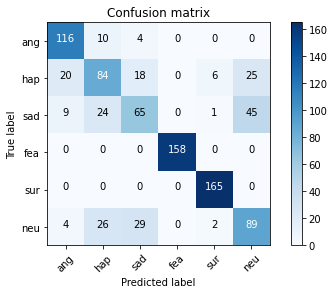

In [532]:
print('Testing')
pred_probs_xgb_mfcc_30 = xgb_model_mfcc_30.predict_proba(X_test_30_mfcc)
display_results(y_test_30_mfcc, pred_probs_xgb_mfcc_30)

In [533]:
target_names = ['ang', 'hap', 'sad', 'fea', 'sur', 'neu']
print(classification_report(y_onehot_test_10_mfcc.argmax(axis=1), pred_probs_xgb_mfcc_30.argmax(axis=1), target_names=target_names))

              precision    recall  f1-score   support

         ang       0.78      0.89      0.83       130
         hap       0.58      0.55      0.57       153
         sad       0.56      0.45      0.50       144
         fea       1.00      1.00      1.00       158
         sur       0.95      1.00      0.97       165
         neu       0.56      0.59      0.58       150

    accuracy                           0.75       900
   macro avg       0.74      0.75      0.74       900
weighted avg       0.74      0.75      0.75       900



/home/jupyter-reynaldo_delimajr/.local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:25:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


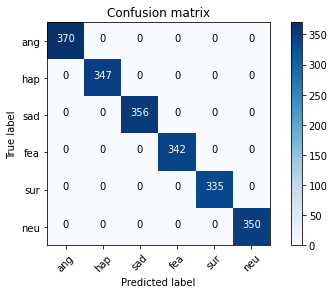

In [543]:
# XGB Sahu 10 seconds - For Best Experiment
xgb_model_mel_10 = xgb.XGBClassifier(max_depth=7, learning_rate=0.2, objective='multi:softprob',
                              n_estimators=110, subsample=1, num_class=len(emotion_dict),
                              booster='gbtree', n_jobs=4)
xgb_model_mel_10.fit(X_train_10_mel, y_train_10_mel)

print('Training')
pred_probs = xgb_model_mel_10.predict_proba(X_train_10_mel)
display_results(y_train_10_mel, pred_probs)

Testing
6
Test Set Accuracy =  0.762
Test Set F-score =  0.751
Test Set Precision =  0.747
Test Set Recall =  0.758
Confusion matrix, without normalization
[[120   4   6   0   0   0]
 [ 23  85  23   1   3  18]
 [ 12  26  67   0   0  39]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  6  21  32   0   0  91]]


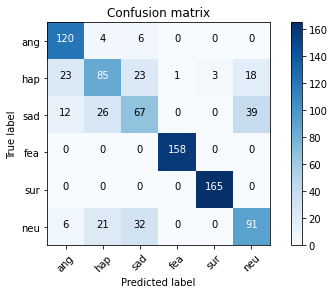

In [545]:
print('Testing')
pred_probs_xgb_mel_10 = xgb_model_mel_10.predict_proba(X_test_10_mel)
display_results(y_test_10_mel, pred_probs_xgb_mel_10)

In [546]:
target_names = ['ang', 'hap', 'sad', 'fea', 'sur', 'neu']
print(classification_report(y_onehot_test_10_mfcc.argmax(axis=1), pred_probs_xgb_mel_10.argmax(axis=1), target_names=target_names))

              precision    recall  f1-score   support

         ang       0.75      0.92      0.82       130
         hap       0.62      0.56      0.59       153
         sad       0.52      0.47      0.49       144
         fea       0.99      1.00      1.00       158
         sur       0.98      1.00      0.99       165
         neu       0.61      0.61      0.61       150

    accuracy                           0.76       900
   macro avg       0.75      0.76      0.75       900
weighted avg       0.75      0.76      0.76       900



In [547]:
# indices and labels of all correctly recognized
correct_indices = print_index(y_onehot_test_10_mfcc.argmax(axis=1), pred_probs_xgb_mel_10.argmax(axis=1))
correct_labels = print_labels(y_onehot_test_10_mfcc.argmax(axis=1), pred_probs_xgb_mel_10.argmax(axis=1))

len(correct_indices)

686

In [548]:
# indices of correctly recognized AND clipped
indices_of_clipped_recognized = []
for i in range(len(X_test_10_mfcc)):
    for j in range(len(correct_indices)):
        if(i == correct_indices[j]):
            if(i in x_clipped):
                indices_of_clipped_recognized.append(i)

label_of_clipped_recognized = []
# we get the label of correctly recognized clipped audios
for i in range(len(y_onehot_test_10_mfcc.argmax(axis=1))):
    if(i in indices_of_clipped_recognized):
        label_of_clipped_recognized.append((y_onehot_test_10_mfcc.argmax(axis=1)[i]))

In [549]:
dic_val_clipped = count_label(label_of_clipped_recognized)

dic_val_clipped

{'ang': 8, 'hap': 5, 'sad': 3, 'fea': 0, 'sur': 7, 'neu': 2}

<BarContainer object of 6 artists>

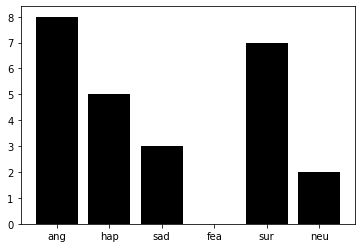

In [550]:
plt.bar(list(dic_val_clipped.keys()), dic_val_clipped.values(), color='black')

In [551]:
clipped_ratio = len(indices_of_clipped_recognized) / len(x_clipped)

clipped_ratio

0.625

In [552]:
# we get the indices of correctly recognized un-clipped audios
indices_of_unclipped_recognized = []
for i in range(len(X_test_10_mfcc)):
    for j in range(len(correct_indices)):
        if(i == correct_indices[j]):
            if(i not in x_clipped):
                indices_of_unclipped_recognized.append(i)

len(indices_of_unclipped_recognized)

661

In [553]:
label_of_unclipped_recognized = []
# we get the label of correctly recognized unclipped audios
for i in range(len(y_onehot_test_10_mfcc.argmax(axis=1))):
    if(i in indices_of_unclipped_recognized):
        label_of_unclipped_recognized.append((y_onehot_test_10_mfcc.argmax(axis=1)[i]))

dic_val_unclipped = count_label(label_of_unclipped_recognized)

<BarContainer object of 6 artists>

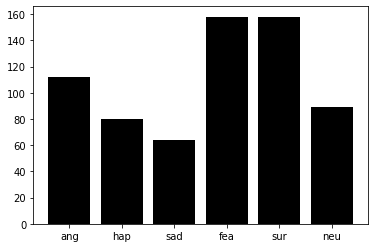

In [554]:
plt.bar(list(dic_val_unclipped.keys()), dic_val_unclipped.values(), color='black')

In [555]:
unclipped_ratio = len(indices_of_unclipped_recognized) / len(x_unclipped)

unclipped_ratio

0.7686046511627908

/home/jupyter-reynaldo_delimajr/.local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:44:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


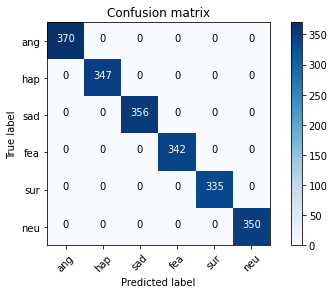

In [516]:
# XGB Sahu 30 seconds - For Best Experiment
xgb_model_mel_30 = xgb.XGBClassifier(max_depth=7, learning_rate=0.2, objective='multi:softprob',
                              n_estimators=110, subsample=1, num_class=len(emotion_dict),
                              booster='gbtree', n_jobs=4)
xgb_model_mel_30.fit(X_train_30_mel, y_train_30_mel)

print('Training')
pred_probs = xgb_model_mel_30.predict_proba(X_train_30_mel)
display_results(y_train_30_mel, pred_probs)

Testing
6
Test Set Accuracy =  0.757
Test Set F-score =  0.747
Test Set Precision =  0.745
Test Set Recall =  0.753
Confusion matrix, without normalization
[[116   6   6   0   0   2]
 [ 22  79  30   0   2  20]
 [  9  22  72   0   0  41]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  4  21  34   0   0  91]]


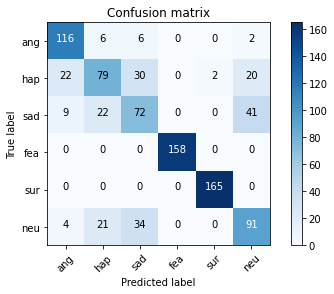

In [556]:
print('Testing')
pred_probs_xgb_mel_30 = xgb_model_mel_30.predict_proba(X_test_30_mel)
display_results(y_test_30_mel, pred_probs_xgb_mel_30)

In [557]:
target_names = ['ang', 'hap', 'sad', 'fea', 'sur', 'neu']
print(classification_report(y_onehot_test_10_mfcc.argmax(axis=1), pred_probs_xgb_mel_30.argmax(axis=1), target_names=target_names))

              precision    recall  f1-score   support

         ang       0.77      0.89      0.83       130
         hap       0.62      0.52      0.56       153
         sad       0.51      0.50      0.50       144
         fea       1.00      1.00      1.00       158
         sur       0.99      1.00      0.99       165
         neu       0.59      0.61      0.60       150

    accuracy                           0.76       900
   macro avg       0.75      0.75      0.75       900
weighted avg       0.75      0.76      0.75       900



#### 30 seconds

## MEL ML

### Random Forest Classifier

#### 10 seconds

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


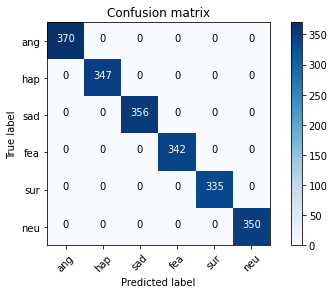

In [265]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=2)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.757
Test Set F-score =  0.745
Test Set Precision =  0.742
Test Set Recall =  0.753
Confusion matrix, without normalization
[[120   6   4   0   0   0]
 [ 26  82  19   0   1  25]
 [ 13  29  67   0   0  35]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  6  23  32   0   0  89]]


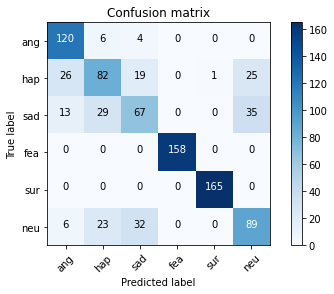

In [266]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


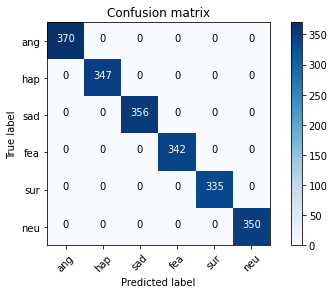

In [267]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=4)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.749
Test Set F-score =  0.735
Test Set Precision =  0.734
Test Set Recall =  0.745
Confusion matrix, without normalization
[[120   8   2   0   0   0]
 [ 26  80  17   0   1  29]
 [ 12  31  57   0   0  44]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  4  23  29   0   0  94]]


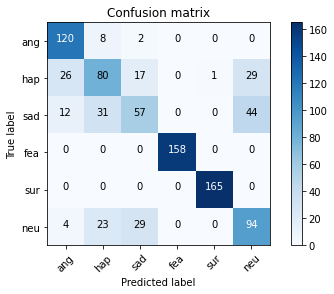

In [268]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


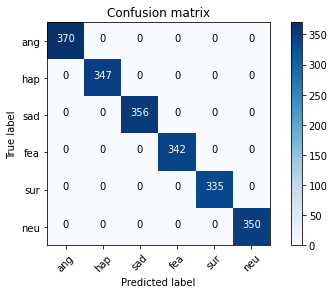

In [269]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=8)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.761
Test Set F-score =  0.747
Test Set Precision =  0.745
Test Set Recall =  0.758
Confusion matrix, without normalization
[[124   4   2   0   0   0]
 [ 26  86  14   0   2  25]
 [ 16  29  60   0   0  39]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  4  21  33   0   0  92]]


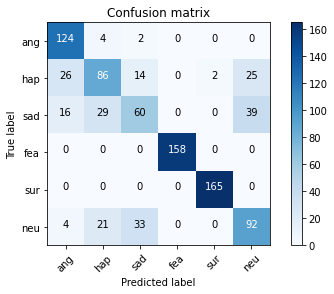

In [270]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.990
Test Set F-score =  0.990
Test Set Precision =  0.990
Test Set Recall =  0.990
Confusion matrix, without normalization
[[367   0   1   0   0   2]
 [  0 335   3   0   0   9]
 [  3   1 352   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  1   2   0   0   0 347]]


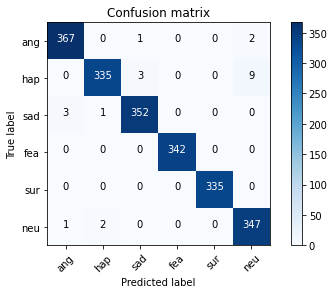

In [271]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=16)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.749
Test Set F-score =  0.735
Test Set Precision =  0.733
Test Set Recall =  0.745
Confusion matrix, without normalization
[[119   8   1   0   0   2]
 [ 29  80  18   0   3  23]
 [ 14  31  59   0   0  40]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  7  20  30   0   0  93]]


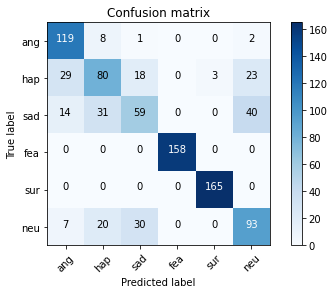

In [272]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.919
Test Set F-score =  0.919
Test Set Precision =  0.920
Test Set Recall =  0.920
Confusion matrix, without normalization
[[352   0   6   0   1  11]
 [  6 298  14   0   3  26]
 [ 22  24 293   0   0  17]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [ 14  18   7   0   1 310]]


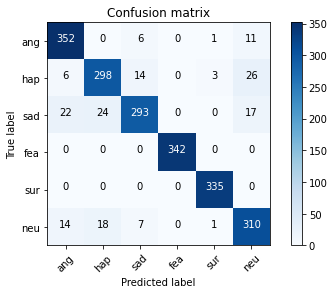

In [273]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=32)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.729
Test Set F-score =  0.711
Test Set Precision =  0.713
Test Set Recall =  0.724
Confusion matrix, without normalization
[[113   6   3   0   1   7]
 [ 32  71  16   0   8  26]
 [ 21  21  58   0   1  43]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  8  18  28   0   5  91]]


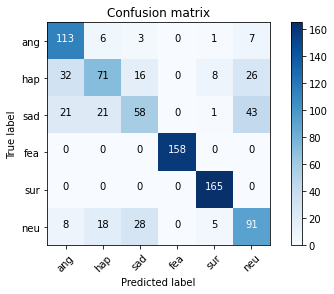

In [274]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.824
Test Set F-score =  0.823
Test Set Precision =  0.829
Test Set Recall =  0.825
Confusion matrix, without normalization
[[341   0   6   0   1  22]
 [ 37 239  19   0  11  41]
 [ 53  40 211   0   3  49]
 [  0   0   0 342   0   0]
 [  3   4   5   0 323   0]
 [ 19  31  22   0   3 275]]


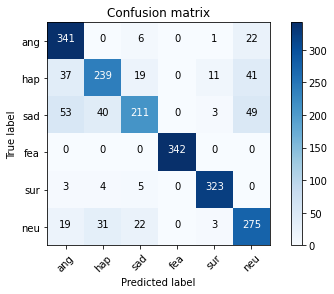

In [275]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=64)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.697
Test Set F-score =  0.677
Test Set Precision =  0.684
Test Set Recall =  0.693
Confusion matrix, without normalization
[[112   4   3   0   1  10]
 [ 42  58  15   0   9  29]
 [ 25  19  52   0   4  44]
 [  0   0   0 158   0   0]
 [  5   4   3   0 153   0]
 [ 10  17  25   0   4  94]]


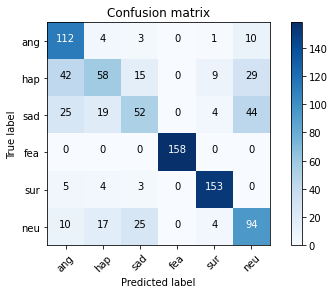

In [276]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.742
Test Set F-score =  0.737
Test Set Precision =  0.753
Test Set Recall =  0.744
Confusion matrix, without normalization
[[313  14   9   0   8  26]
 [ 97 160  19   0  19  52]
 [ 67  32 179   0   4  74]
 [  0   0   0 342   0   0]
 [ 12   6   5   0 312   0]
 [ 32  22  38   0   6 252]]


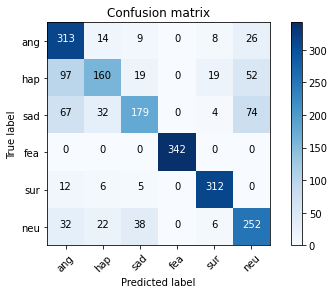

In [277]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=128)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.664
Test Set F-score =  0.641
Test Set Precision =  0.651
Test Set Recall =  0.660
Confusion matrix, without normalization
[[107   5   4   0   2  12]
 [ 47  49  12   0  11  34]
 [ 27  20  45   0   7  45]
 [  0   0   0 158   0   0]
 [ 13   2   3   0 147   0]
 [  9  17  25   0   7  92]]


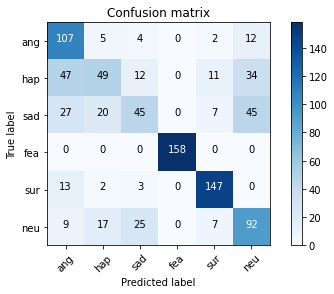

In [278]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


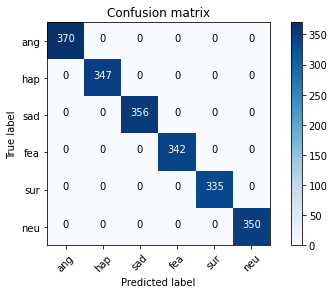

In [279]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=2)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.772
Test Set F-score =  0.760
Test Set Precision =  0.759
Test Set Recall =  0.769
Confusion matrix, without normalization
[[124   6   0   0   0   0]
 [ 23  88  20   0   0  22]
 [ 10  32  62   0   0  40]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  4  23  25   0   0  98]]


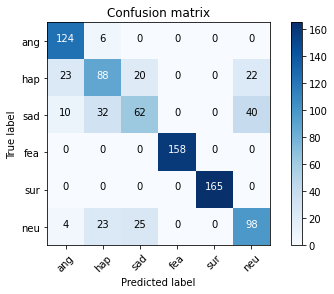

In [280]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


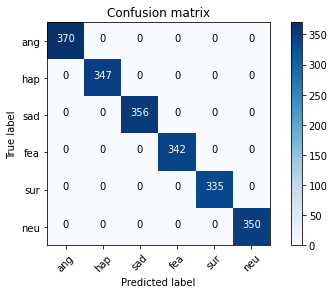

In [281]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=4)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.767
Test Set F-score =  0.756
Test Set Precision =  0.754
Test Set Recall =  0.763
Confusion matrix, without normalization
[[120   8   2   0   0   0]
 [ 19  91  18   0   0  25]
 [ 11  29  65   0   0  39]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  6  20  33   0   0  91]]


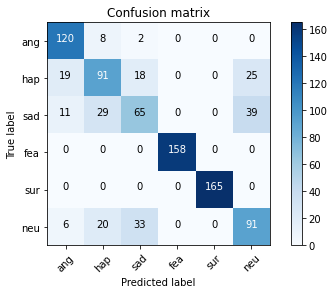

In [282]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


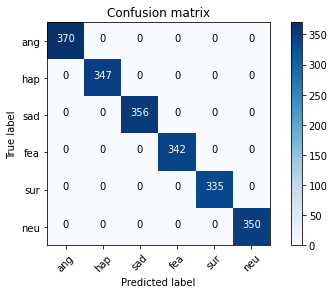

In [283]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=8)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.741
Test Set F-score =  0.729
Test Set Precision =  0.727
Test Set Recall =  0.736
Confusion matrix, without normalization
[[114  14   2   0   0   0]
 [ 25  82  18   0   1  27]
 [ 13  34  57   0   0  40]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  4  24  31   0   0  91]]


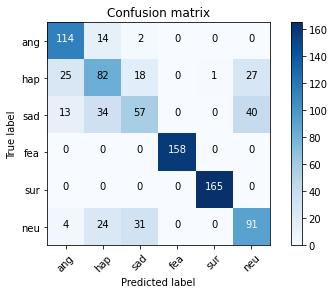

In [284]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.990
Test Set F-score =  0.990
Test Set Precision =  0.990
Test Set Recall =  0.990
Confusion matrix, without normalization
[[368   0   0   0   0   2]
 [  1 339   2   0   0   5]
 [  2   1 353   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  3   5   0   0   0 342]]


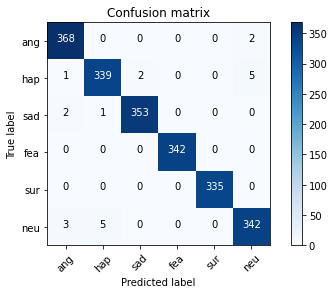

In [285]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=16)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.760
Test Set F-score =  0.745
Test Set Precision =  0.744
Test Set Recall =  0.756
Confusion matrix, without normalization
[[122   6   0   0   0   2]
 [ 28  85  16   0   3  21]
 [ 15  29  56   0   0  44]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  4  21  27   0   0  98]]


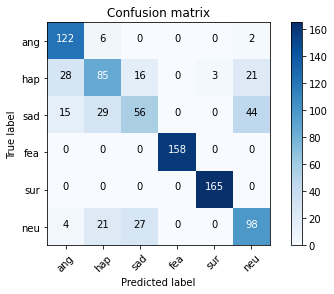

In [286]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.921
Test Set F-score =  0.921
Test Set Precision =  0.922
Test Set Recall =  0.922
Confusion matrix, without normalization
[[356   0   3   0   0  11]
 [  6 300  15   0   3  23]
 [ 22  28 292   0   0  14]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [ 14  20   6   0   1 309]]


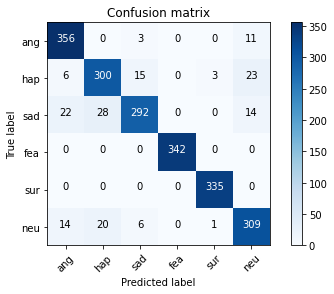

In [287]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=32)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.731
Test Set F-score =  0.713
Test Set Precision =  0.716
Test Set Recall =  0.726
Confusion matrix, without normalization
[[115   4   3   0   0   8]
 [ 33  71  14   0   6  29]
 [ 20  25  54   0   0  45]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  7  21  24   0   3  95]]


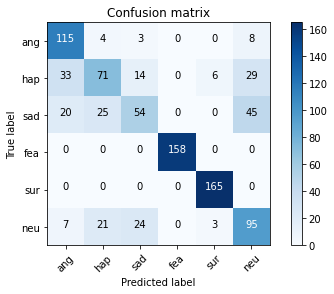

In [288]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.821
Test Set F-score =  0.820
Test Set Precision =  0.827
Test Set Recall =  0.823
Confusion matrix, without normalization
[[332   3   6   0   4  25]
 [ 46 229  18   0  10  44]
 [ 49  35 221   0   3  48]
 [  0   0   0 342   0   0]
 [  3   0   5   0 327   0]
 [ 23  27  22   0   4 274]]


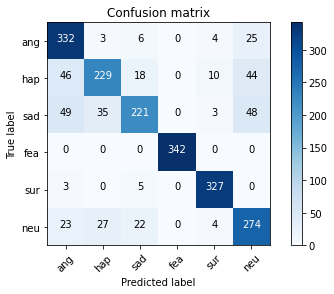

In [289]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=64)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.690
Test Set F-score =  0.667
Test Set Precision =  0.673
Test Set Recall =  0.685
Confusion matrix, without normalization
[[109   3   5   0   2  11]
 [ 43  49  14   0  13  34]
 [ 21  25  53   0   4  41]
 [  0   0   0 158   0   0]
 [  5   0   3   0 157   0]
 [ 10  16  22   0   7  95]]


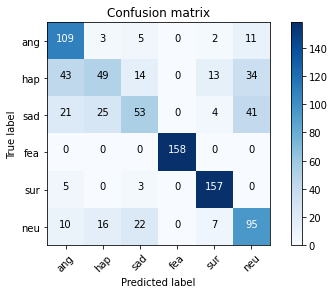

In [290]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.741
Test Set F-score =  0.736
Test Set Precision =  0.754
Test Set Recall =  0.742
Confusion matrix, without normalization
[[319   9   5   0   9  28]
 [112 150  16   0  20  49]
 [ 68  32 185   0   9  62]
 [  0   0   0 342   0   0]
 [ 12   6   5   0 309   3]
 [ 32  25  39   0   3 251]]


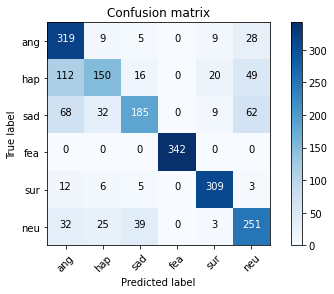

In [291]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=128)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.653
Test Set F-score =  0.629
Test Set Precision =  0.641
Test Set Recall =  0.650
Confusion matrix, without normalization
[[109   4   2   0   5  10]
 [ 52  42  15   0  16  28]
 [ 28  16  48   0   7  45]
 [  0   0   0 158   0   0]
 [ 13   2   3   0 142   5]
 [ 10  16  27   0   8  89]]


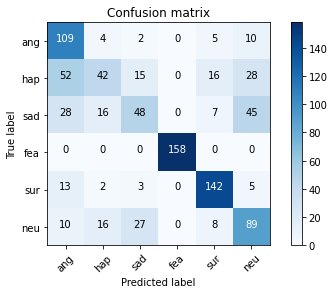

In [292]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


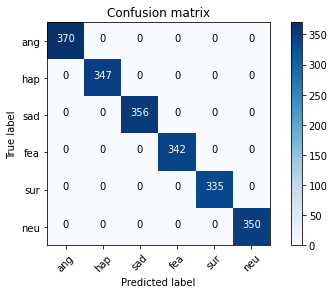

In [293]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=2)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.764
Test Set F-score =  0.753
Test Set Precision =  0.751
Test Set Recall =  0.760
Confusion matrix, without normalization
[[120  10   0   0   0   0]
 [ 23  88  18   0   0  24]
 [ 11  30  63   0   0  40]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  6  19  31   0   0  94]]


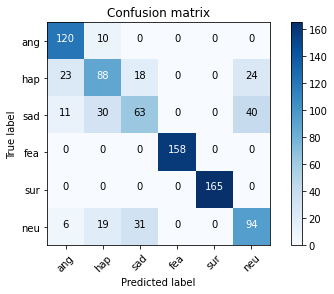

In [294]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


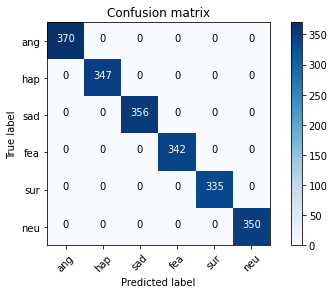

In [295]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=4)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.772
Test Set F-score =  0.760
Test Set Precision =  0.759
Test Set Recall =  0.769
Confusion matrix, without normalization
[[124   4   2   0   0   0]
 [ 22  86  17   0   1  27]
 [ 13  29  67   0   0  35]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  6  20  29   0   0  95]]


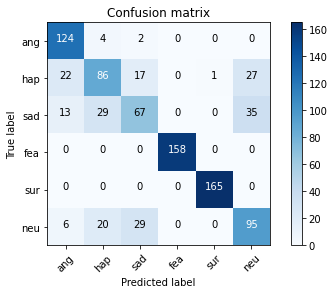

In [296]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


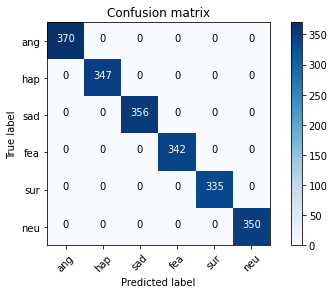

In [423]:
# RFC Training and Testing 10 sec Duration - For Best Experiment
rfc_best_mel_10 = RandomForestClassifier(n_estimators=400, min_samples_split=4)
rfc_best_mel_10.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc_best_mel_10.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.769
Test Set F-score =  0.757
Test Set Precision =  0.756
Test Set Recall =  0.765
Confusion matrix, without normalization
[[120   8   2   0   0   0]
 [ 22  90  19   0   0  22]
 [  9  33  61   0   0  41]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  4  23  25   0   0  98]]


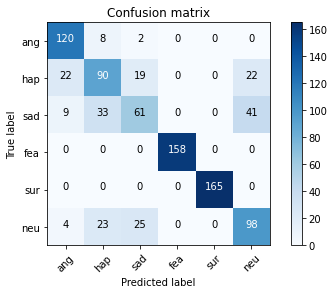

In [481]:
# Testing
pred_probs_mel_10 = rfc_best_mel_10.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs_mel_10)

In [484]:
target_names = ['ang', 'hap', 'sad', 'fea', 'sur', 'neu']
print(classification_report(y_onehot_test_10_mfcc.argmax(axis=1), pred_probs_mel_10.argmax(axis=1), target_names=target_names))

              precision    recall  f1-score   support

         ang       0.77      0.92      0.84       130
         hap       0.58      0.59      0.59       153
         sad       0.57      0.42      0.49       144
         fea       1.00      1.00      1.00       158
         sur       1.00      1.00      1.00       165
         neu       0.61      0.65      0.63       150

    accuracy                           0.77       900
   macro avg       0.76      0.76      0.76       900
weighted avg       0.76      0.77      0.76       900



In [485]:
# indices and labels of all correctly recognized
correct_indices = print_index(y_onehot_test_10_mfcc.argmax(axis=1), pred_probs_mel_10.argmax(axis=1))
correct_labels = print_labels(y_onehot_test_10_mfcc.argmax(axis=1), pred_probs_mel_10.argmax(axis=1))

len(correct_indices)

692

In [486]:
# indices of correctly recognized AND clipped
indices_of_clipped_recognized = []
for i in range(len(X_test_10_mfcc)):
    for j in range(len(correct_indices)):
        if(i == correct_indices[j]):
            if(i in x_clipped):
                indices_of_clipped_recognized.append(i)

label_of_clipped_recognized = []
# we get the label of correctly recognized clipped audios
for i in range(len(y_onehot_test_10_mfcc.argmax(axis=1))):
    if(i in indices_of_clipped_recognized):
        label_of_clipped_recognized.append((y_onehot_test_10_mfcc.argmax(axis=1)[i]))


In [487]:
dic_val_clipped = count_label(label_of_clipped_recognized)

dic_val_clipped

{'ang': 8, 'hap': 4, 'sad': 3, 'fea': 0, 'sur': 7, 'neu': 4}

<BarContainer object of 6 artists>

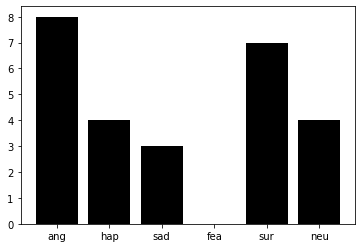

In [488]:
plt.bar(list(dic_val_clipped.keys()), dic_val_clipped.values(), color='black')

In [489]:
clipped_ratio = len(indices_of_clipped_recognized) / len(x_clipped)

clipped_ratio

0.65

In [490]:
# we get the indices of correctly recognized un-clipped audios
indices_of_unclipped_recognized = []
for i in range(len(X_test_10_mfcc)):
    for j in range(len(correct_indices)):
        if(i == correct_indices[j]):
            if(i not in x_clipped):
                indices_of_unclipped_recognized.append(i)

len(indices_of_unclipped_recognized)

666

In [491]:
label_of_unclipped_recognized = []
# we get the label of correctly recognized unclipped audios
for i in range(len(y_onehot_test_10_mfcc.argmax(axis=1))):
    if(i in indices_of_unclipped_recognized):
        label_of_unclipped_recognized.append((y_onehot_test_10_mfcc.argmax(axis=1)[i]))

In [492]:
dic_val_unclipped = count_label(label_of_unclipped_recognized)

<BarContainer object of 6 artists>

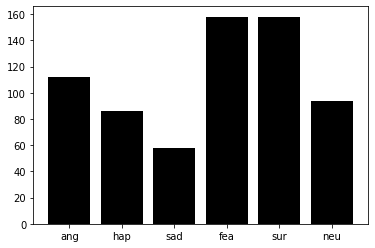

In [493]:
plt.bar(list(dic_val_unclipped.keys()), dic_val_unclipped.values(), color='black')

In [494]:
unclipped_ratio = len(indices_of_unclipped_recognized) / len(x_unclipped)

unclipped_ratio

0.7744186046511627

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


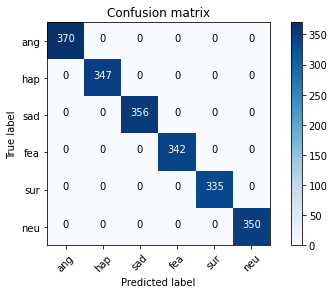

In [495]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=8)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.764
Test Set F-score =  0.751
Test Set Precision =  0.750
Test Set Recall =  0.761
Confusion matrix, without normalization
[[124   6   0   0   0   0]
 [ 23  87  17   0   1  25]
 [ 11  32  57   0   0  44]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  5  23  25   0   0  97]]


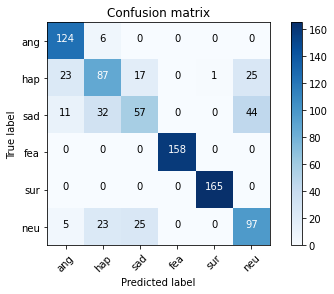

In [298]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.992
Test Set F-score =  0.992
Test Set Precision =  0.992
Test Set Recall =  0.992
Confusion matrix, without normalization
[[368   0   0   0   0   2]
 [  0 340   3   0   0   4]
 [  3   1 352   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  1   3   0   0   0 346]]


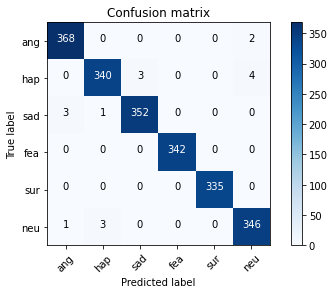

In [299]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=16)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.752
Test Set F-score =  0.738
Test Set Precision =  0.738
Test Set Recall =  0.748
Confusion matrix, without normalization
[[120   6   2   0   0   2]
 [ 27  82  14   0   2  28]
 [ 12  30  56   0   0  46]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  6  21  27   0   0  96]]


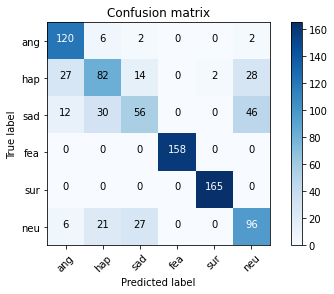

In [300]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.927
Test Set F-score =  0.927
Test Set Precision =  0.928
Test Set Recall =  0.927
Confusion matrix, without normalization
[[357   0   2   0   0  11]
 [  5 304  14   0   1  23]
 [ 21  25 296   0   0  14]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [ 16  15   6   0   1 312]]


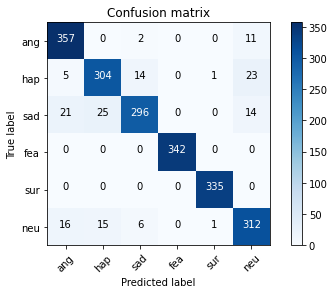

In [301]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=32)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.734
Test Set F-score =  0.718
Test Set Precision =  0.718
Test Set Recall =  0.730
Confusion matrix, without normalization
[[116   4   2   0   0   8]
 [ 27  74  17   0   7  28]
 [ 13  30  56   0   0  45]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  8  17  29   0   4  92]]


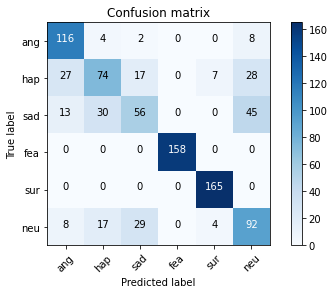

In [302]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.830
Test Set F-score =  0.829
Test Set Precision =  0.833
Test Set Recall =  0.831
Confusion matrix, without normalization
[[334   3   6   0   5  22]
 [ 38 239  20   0  12  38]
 [ 48  36 225   0   1  46]
 [  0   0   0 342   0   0]
 [  3   0   5   0 327   0]
 [ 20  30  22   0   3 275]]


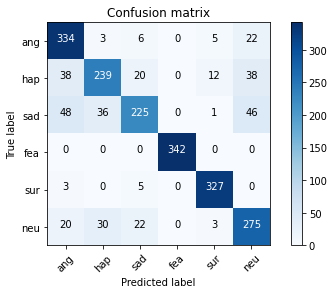

In [303]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=64)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.703
Test Set F-score =  0.682
Test Set Precision =  0.690
Test Set Recall =  0.699
Confusion matrix, without normalization
[[111   3   3   0   3  10]
 [ 42  59  11   0  12  29]
 [ 22  24  51   0   3  44]
 [  0   0   0 158   0   0]
 [  5   0   3   0 157   0]
 [  9  16  21   0   7  97]]


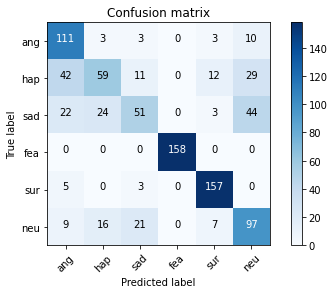

In [304]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.748
Test Set F-score =  0.743
Test Set Precision =  0.758
Test Set Recall =  0.749
Confusion matrix, without normalization
[[325   6   8   0   5  26]
 [ 99 165  20   0  16  47]
 [ 65  35 179   0  10  67]
 [  0   0   0 342   0   0]
 [ 12   6   5   0 307   5]
 [ 28  30  35   0   5 252]]


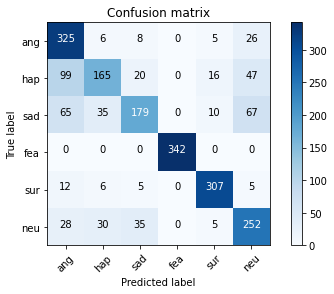

In [305]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=128)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.663
Test Set F-score =  0.640
Test Set Precision =  0.653
Test Set Recall =  0.660
Confusion matrix, without normalization
[[112   2   3   0   3  10]
 [ 48  49  13   0  12  31]
 [ 26  19  45   0   6  48]
 [  0   0   0 158   0   0]
 [ 13   2   3   0 143   4]
 [ 11  15  26   0   8  90]]


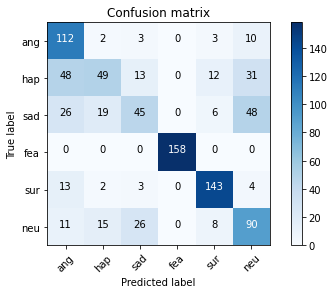

In [306]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


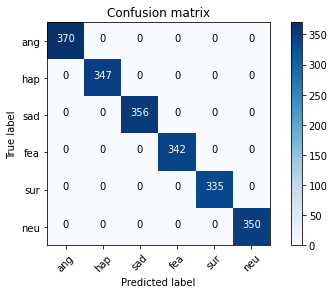

In [379]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=2)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.767
Test Set F-score =  0.754
Test Set Precision =  0.754
Test Set Recall =  0.763
Confusion matrix, without normalization
[[122   8   0   0   0   0]
 [ 22  90  15   0   0  26]
 [ 12  30  60   0   0  42]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  4  24  27   0   0  95]]


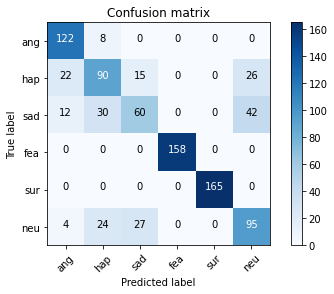

In [380]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


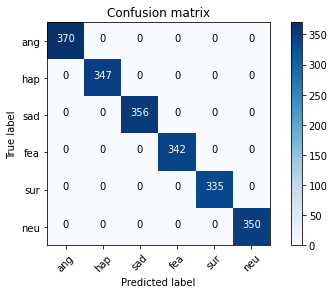

In [381]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=4)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.768
Test Set F-score =  0.755
Test Set Precision =  0.755
Test Set Recall =  0.764
Confusion matrix, without normalization
[[122   8   0   0   0   0]
 [ 22  86  16   0   1  28]
 [ 15  29  61   0   0  39]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  4  22  25   0   0  99]]


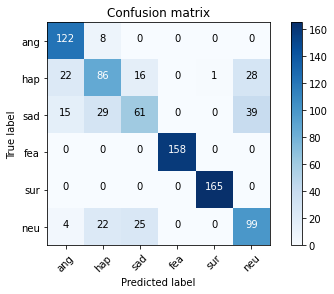

In [382]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


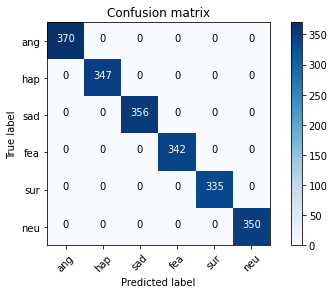

In [383]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=8)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.763
Test Set F-score =  0.750
Test Set Precision =  0.750
Test Set Recall =  0.759
Confusion matrix, without normalization
[[122   8   0   0   0   0]
 [ 22  89  15   0   0  27]
 [ 13  28  57   0   0  46]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  5  19  30   0   0  96]]


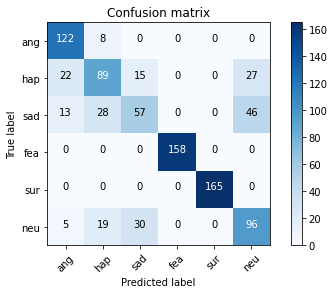

In [384]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.995
Test Set F-score =  0.995
Test Set Precision =  0.995
Test Set Recall =  0.995
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 342   1   0   0   4]
 [  2   1 353   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  1   2   0   0   0 347]]


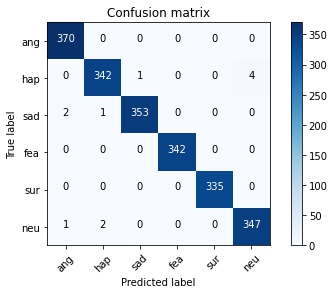

In [385]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=16)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.759
Test Set F-score =  0.745
Test Set Precision =  0.745
Test Set Recall =  0.755
Confusion matrix, without normalization
[[120  10   0   0   0   0]
 [ 25  84  16   0   1  27]
 [ 14  28  57   0   0  45]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  5  20  26   0   0  99]]


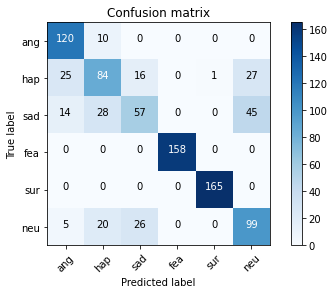

In [386]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.924
Test Set F-score =  0.924
Test Set Precision =  0.925
Test Set Recall =  0.924
Confusion matrix, without normalization
[[357   0   4   0   0   9]
 [  3 303  15   0   3  23]
 [ 26  23 292   0   0  15]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [ 15  17   6   0   1 311]]


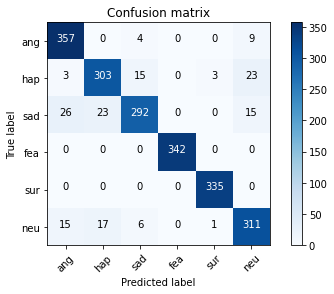

In [387]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=32)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.732
Test Set F-score =  0.714
Test Set Precision =  0.717
Test Set Recall =  0.728
Confusion matrix, without normalization
[[118   2   2   0   0   8]
 [ 30  71  14   0   6  32]
 [ 20  27  51   0   0  46]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  7  19  27   0   1  96]]


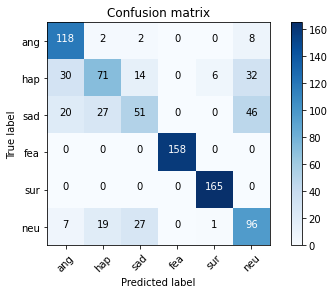

In [388]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.832
Test Set F-score =  0.830
Test Set Precision =  0.836
Test Set Recall =  0.833
Confusion matrix, without normalization
[[334   3   7   0   1  25]
 [ 36 239  20   0  13  39]
 [ 46  39 221   0   3  47]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [ 22  28  21   0   3 276]]


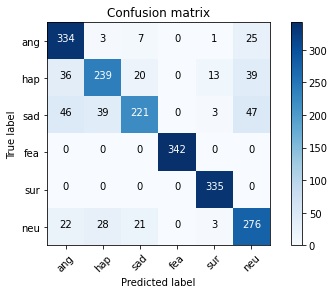

In [389]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=64)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.704
Test Set F-score =  0.680
Test Set Precision =  0.690
Test Set Recall =  0.699
Confusion matrix, without normalization
[[111   3   4   0   1  11]
 [ 45  54  11   0  10  33]
 [ 23  21  50   0   4  46]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  9  16  22   0   7  96]]


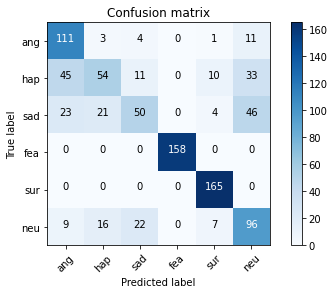

In [390]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.743
Test Set F-score =  0.738
Test Set Precision =  0.755
Test Set Recall =  0.745
Confusion matrix, without normalization
[[323   6   7   0   7  27]
 [106 156  16   0  13  56]
 [ 64  38 181   0   8  65]
 [  0   0   0 342   0   0]
 [ 12   6   5   0 309   3]
 [ 27  35  33   0   5 250]]


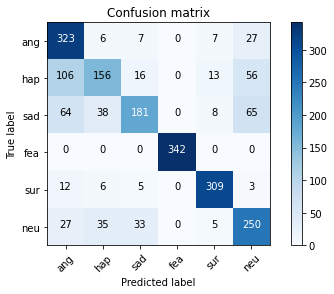

In [391]:
# RFC Training and Testing 10 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=128)
rfc.fit(X_train_10_mel, y_train_10_mel)

# Training
pred_probs = rfc.predict_proba(X_train_10_mel)
print('Training Results')
display_results(y_train_10_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.666
Test Set F-score =  0.644
Test Set Precision =  0.657
Test Set Recall =  0.662
Confusion matrix, without normalization
[[111   3   2   0   3  11]
 [ 48  49  12   0  10  34]
 [ 26  21  47   0   6  44]
 [  0   0   0 158   0   0]
 [ 13   2   3   0 142   5]
 [ 10  15  26   0   7  92]]


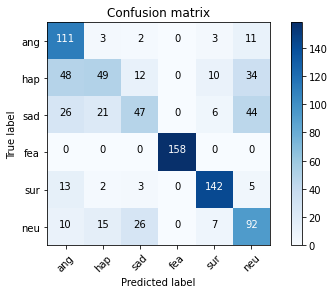

In [392]:
# Testing
pred_probs = rfc.predict_proba(X_test_10_mel)
print('Testing Results')
display_results(y_test_10_mel, pred_probs)

#### 30 seconds

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


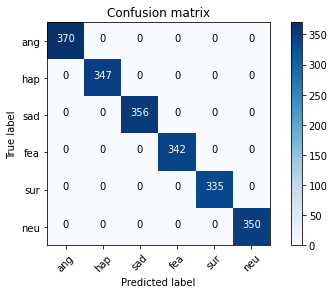

In [321]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=2)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.757
Test Set F-score =  0.745
Test Set Precision =  0.742
Test Set Recall =  0.752
Confusion matrix, without normalization
[[120   8   2   0   0   0]
 [ 17  86  23   0   0  27]
 [ 12  34  58   0   0  40]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  6  23  27   0   0  94]]


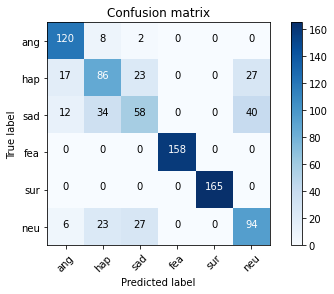

In [322]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


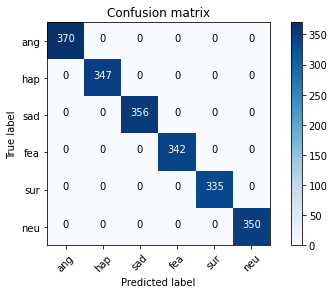

In [323]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=4)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.762
Test Set F-score =  0.749
Test Set Precision =  0.749
Test Set Recall =  0.758
Confusion matrix, without normalization
[[120  10   0   0   0   0]
 [ 20  85  20   0   0  28]
 [ 12  28  57   0   0  47]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  4  19  26   0   0 101]]


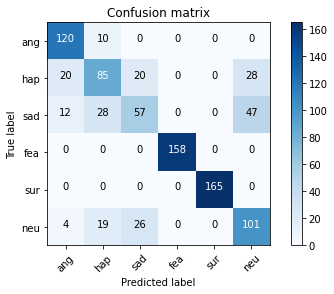

In [324]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


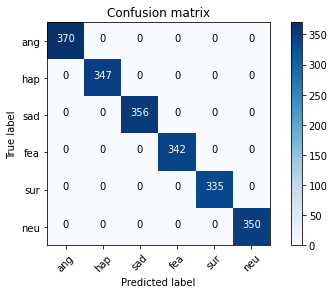

In [325]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=8)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.753
Test Set F-score =  0.741
Test Set Precision =  0.739
Test Set Recall =  0.749
Confusion matrix, without normalization
[[120  10   0   0   0   0]
 [ 26  83  20   0   0  24]
 [ 11  26  60   0   0  47]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  6  20  32   0   0  92]]


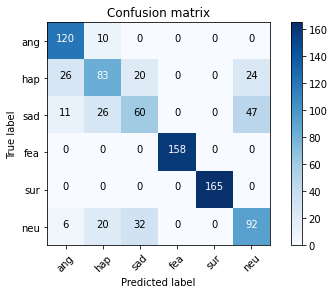

In [326]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.990
Test Set F-score =  0.990
Test Set Precision =  0.990
Test Set Recall =  0.990
Confusion matrix, without normalization
[[367   0   1   0   0   2]
 [  0 342   2   0   0   3]
 [  1   4 350   0   0   1]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  4   4   0   0   0 342]]


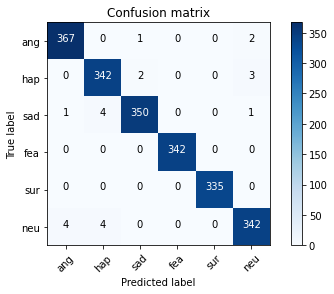

In [327]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=16)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.744
Test Set F-score =  0.728
Test Set Precision =  0.729
Test Set Recall =  0.740
Confusion matrix, without normalization
[[119   8   1   0   0   2]
 [ 33  76  16   0   3  25]
 [ 19  22  56   0   0  47]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  5  21  28   0   0  96]]


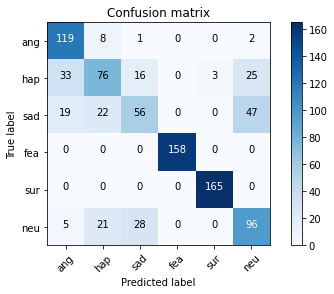

In [328]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.928
Test Set F-score =  0.928
Test Set Precision =  0.930
Test Set Recall =  0.929
Confusion matrix, without normalization
[[357   1   1   0   1  10]
 [  3 302  14   0   4  24]
 [ 21  25 297   0   0  13]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [ 14  18   1   0   1 316]]


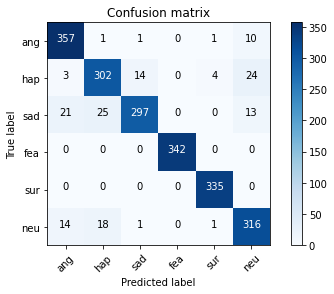

In [329]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=32)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.714
Test Set F-score =  0.694
Test Set Precision =  0.698
Test Set Recall =  0.709
Confusion matrix, without normalization
[[114   3   3   0   1   9]
 [ 34  60  16   0   8  35]
 [ 16  25  51   0   1  51]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  7  20  25   0   3  95]]


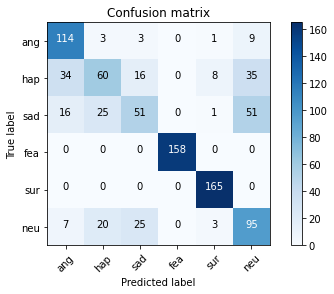

In [330]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.823
Test Set F-score =  0.822
Test Set Precision =  0.829
Test Set Recall =  0.824
Confusion matrix, without normalization
[[335   3   6   0   3  23]
 [ 52 225  21   0  12  37]
 [ 51  33 222   0   2  48]
 [  0   0   0 342   0   0]
 [  3   0   5   0 327   0]
 [ 20  29  22   0   2 277]]


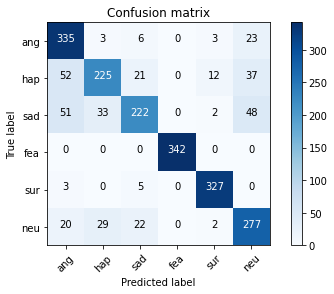

In [331]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=64)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.692
Test Set F-score =  0.670
Test Set Precision =  0.679
Test Set Recall =  0.687
Confusion matrix, without normalization
[[110   5   3   0   1  11]
 [ 44  55  11   0  11  32]
 [ 25  18  50   0   6  45]
 [  0   0   0 158   0   0]
 [  5   0   3   0 157   0]
 [  9  17  24   0   7  93]]


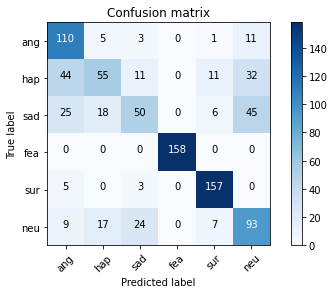

In [332]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.738
Test Set F-score =  0.733
Test Set Precision =  0.750
Test Set Recall =  0.739
Confusion matrix, without normalization
[[317  12   9   0   5  27]
 [107 154  20   0  18  48]
 [ 67  34 182   0  12  61]
 [  0   0   0 342   0   0]
 [ 12   6   5   0 304   8]
 [ 33  26  31   0  10 250]]


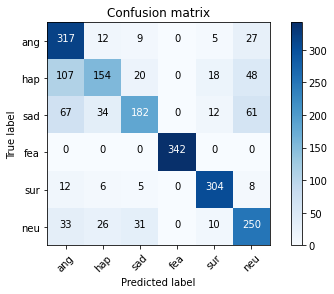

In [333]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=128)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.660
Test Set F-score =  0.639
Test Set Precision =  0.658
Test Set Recall =  0.657
Confusion matrix, without normalization
[[108   4   4   0   5   9]
 [ 50  48  12   0  10  33]
 [ 27  14  48   0   6  49]
 [  0   0   0 158   0   0]
 [ 13   2   3   0 138   9]
 [ 12  13  25   0   6  94]]


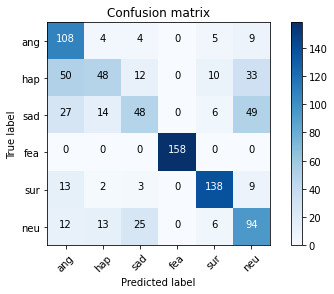

In [334]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


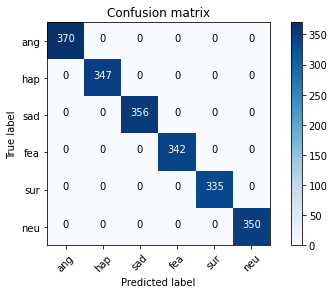

In [335]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=2)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.762
Test Set F-score =  0.750
Test Set Precision =  0.748
Test Set Recall =  0.758
Confusion matrix, without normalization
[[120   8   2   0   0   0]
 [ 19  90  19   0   0  25]
 [ 12  30  56   0   0  46]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  5  17  31   0   0  97]]


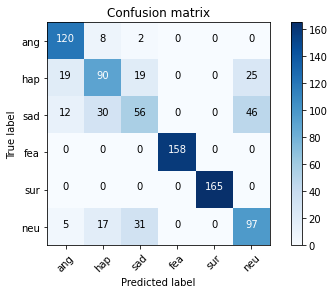

In [336]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


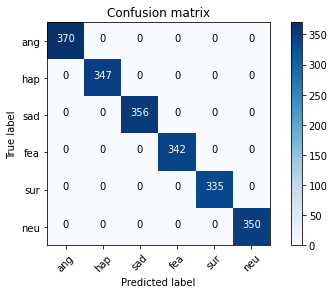

In [337]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=4)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.762
Test Set F-score =  0.749
Test Set Precision =  0.748
Test Set Recall =  0.758
Confusion matrix, without normalization
[[122   6   2   0   0   0]
 [ 22  83  19   0   2  27]
 [ 13  28  59   0   0  44]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  4  24  23   0   0  99]]


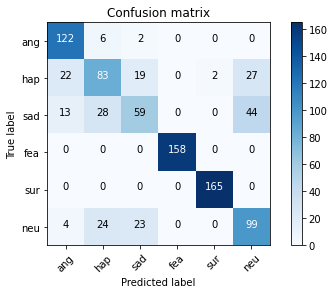

In [338]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


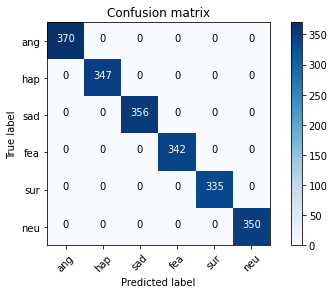

In [339]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=8)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.756
Test Set F-score =  0.744
Test Set Precision =  0.742
Test Set Recall =  0.751
Confusion matrix, without normalization
[[118   8   4   0   0   0]
 [ 23  87  14   0   2  27]
 [ 11  30  62   0   0  41]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  6  23  31   0   0  90]]


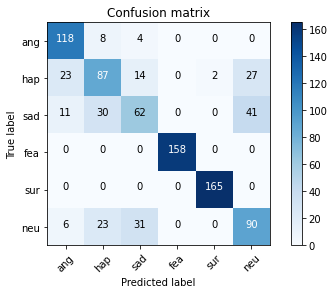

In [340]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.992
Test Set F-score =  0.992
Test Set Precision =  0.992
Test Set Recall =  0.992
Confusion matrix, without normalization
[[368   0   1   0   0   1]
 [  0 340   2   0   0   5]
 [  1   3 352   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  1   3   0   0   0 346]]


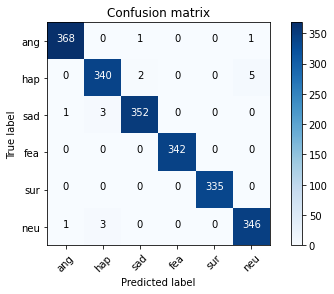

In [341]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=16)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.759
Test Set F-score =  0.743
Test Set Precision =  0.744
Test Set Recall =  0.755
Confusion matrix, without normalization
[[120   6   3   0   0   1]
 [ 24  84  16   0   3  26]
 [ 13  32  54   0   0  45]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  5  21  21   0   1 102]]


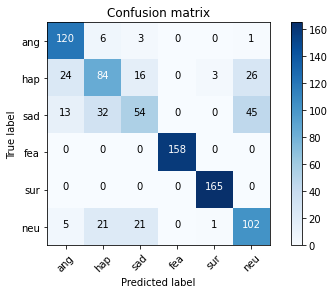

In [342]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.930
Test Set F-score =  0.930
Test Set Precision =  0.931
Test Set Recall =  0.931
Confusion matrix, without normalization
[[358   0   2   0   1   9]
 [  6 304  14   0   1  22]
 [ 19  28 300   0   0   9]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [ 12  19   4   0   1 314]]


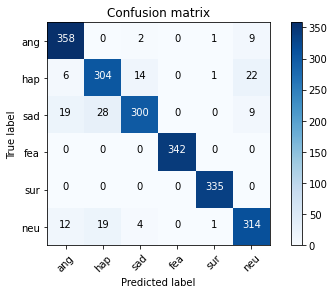

In [343]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=32)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.733
Test Set F-score =  0.715
Test Set Precision =  0.717
Test Set Recall =  0.728
Confusion matrix, without normalization
[[113   6   4   0   1   6]
 [ 30  76  11   0   7  29]
 [ 18  27  51   0   2  46]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  7  18  25   0   3  97]]


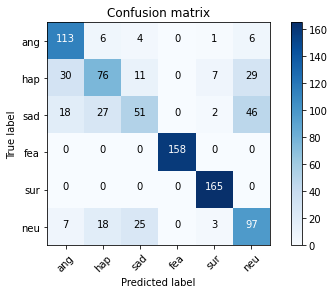

In [344]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.827
Test Set F-score =  0.826
Test Set Precision =  0.834
Test Set Recall =  0.828
Confusion matrix, without normalization
[[335   0   7   0   4  24]
 [ 40 234  17   0  11  45]
 [ 48  34 221   0   4  49]
 [  0   0   0 342   0   0]
 [  3   0   5   0 327   0]
 [ 25  26  18   0   3 278]]


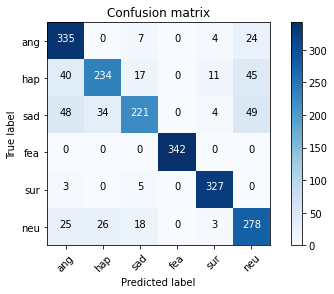

In [345]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=64)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.692
Test Set F-score =  0.669
Test Set Precision =  0.677
Test Set Recall =  0.687
Confusion matrix, without normalization
[[110   2   4   0   4  10]
 [ 39  57  15   0  10  32]
 [ 24  20  47   0   4  49]
 [  0   0   0 158   0   0]
 [  5   0   3   0 157   0]
 [  9  17  23   0   7  94]]


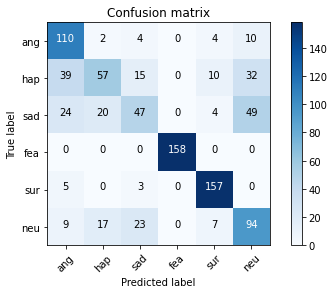

In [346]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.735
Test Set F-score =  0.731
Test Set Precision =  0.746
Test Set Recall =  0.736
Confusion matrix, without normalization
[[306  16  10   0   8  30]
 [111 153  23   0  12  48]
 [ 63  36 184   0   9  64]
 [  0   0   0 342   0   0]
 [ 17   3   5   0 307   3]
 [ 30  28  36   0   5 251]]


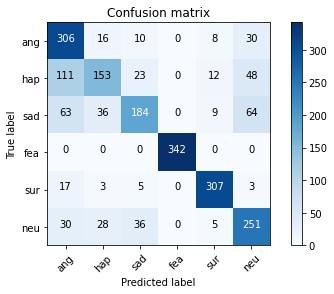

In [347]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=128)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.654
Test Set F-score =  0.635
Test Set Precision =  0.646
Test Set Recall =  0.651
Confusion matrix, without normalization
[[106   5   5   0   4  10]
 [ 50  47  15   0  11  30]
 [ 24  18  51   0   8  43]
 [  0   0   0 158   0   0]
 [ 17   6   3   0 134   5]
 [ 10  15  25   0   7  93]]


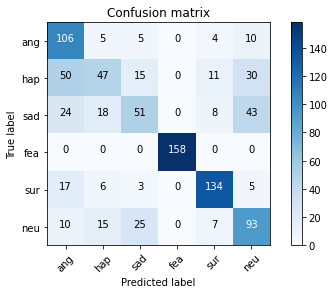

In [348]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


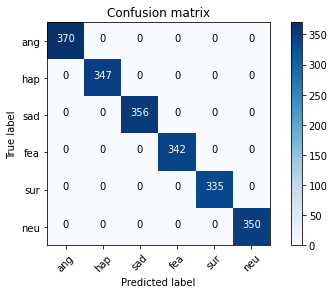

In [349]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=2)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.777
Test Set F-score =  0.764
Test Set Precision =  0.763
Test Set Recall =  0.773
Confusion matrix, without normalization
[[122   6   2   0   0   0]
 [ 22  93  19   0   1  18]
 [ 12  32  61   0   0  39]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  6  21  23   0   0 100]]


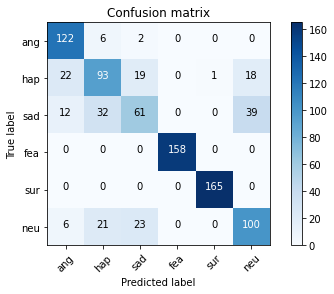

In [350]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


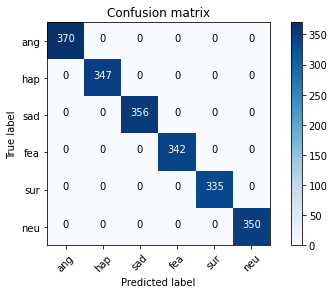

In [137]:
# RFC Training and Testing 30 sec Duration - For Best Experiment
rfc_best_mel_30 = RandomForestClassifier(n_estimators=400, min_samples_split=2)
rfc_best_mel_30.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc_best_mel_30.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.777
Test Set F-score =  0.765
Test Set Precision =  0.765
Test Set Recall =  0.772
Confusion matrix, without normalization
[[120   8   2   0   0   0]
 [ 20  95  14   0   0  24]
 [ 11  30  62   0   0  41]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  3  21  27   0   0  99]]


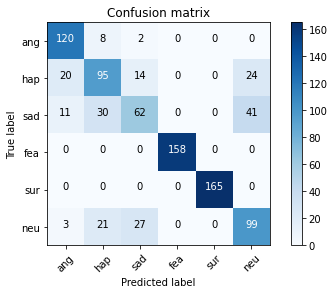

In [138]:
# Testing
pred_probs_mel_30 = rfc_best_mel_30.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs_mel_30)

In [139]:
target_names = ['ang', 'hap', 'sad', 'fea', 'sur', 'neu']
print(classification_report(y_onehot_test_10_mfcc.argmax(axis=1), pred_probs_mel_30.argmax(axis=1), target_names=target_names))

              precision    recall  f1-score   support

         ang       0.78      0.92      0.85       130
         hap       0.62      0.62      0.62       153
         sad       0.59      0.43      0.50       144
         fea       1.00      1.00      1.00       158
         sur       1.00      1.00      1.00       165
         neu       0.60      0.66      0.63       150

    accuracy                           0.78       900
   macro avg       0.77      0.77      0.77       900
weighted avg       0.77      0.78      0.77       900



Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


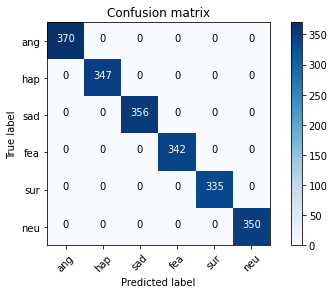

In [351]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=4)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.762
Test Set F-score =  0.750
Test Set Precision =  0.750
Test Set Recall =  0.758
Confusion matrix, without normalization
[[120  10   0   0   0   0]
 [ 20  89  15   0   0  29]
 [ 11  31  58   0   0  44]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  6  19  29   0   0  96]]


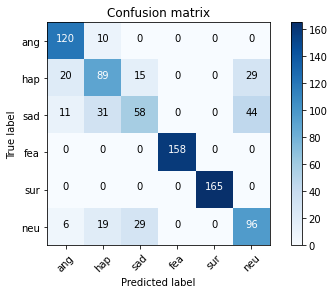

In [352]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


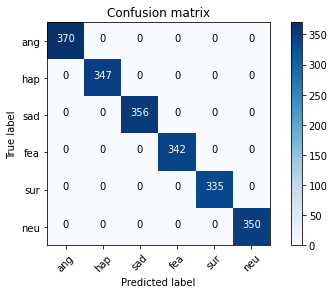

In [353]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=8)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.758
Test Set F-score =  0.745
Test Set Precision =  0.745
Test Set Recall =  0.752
Confusion matrix, without normalization
[[114  14   2   0   0   0]
 [ 21  89  15   0   1  27]
 [ 14  28  58   0   0  44]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  7  18  27   0   0  98]]


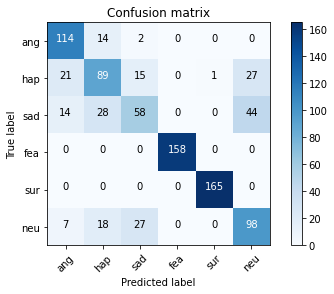

In [354]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.993
Test Set F-score =  0.993
Test Set Precision =  0.993
Test Set Recall =  0.993
Confusion matrix, without normalization
[[369   0   1   0   0   0]
 [  0 341   1   0   0   5]
 [  3   2 351   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   2   0   0   0 348]]


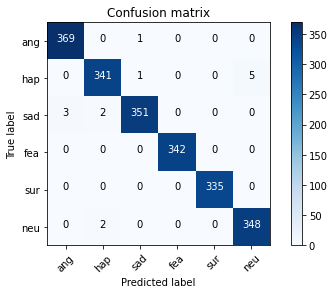

In [355]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=16)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.758
Test Set F-score =  0.743
Test Set Precision =  0.743
Test Set Recall =  0.753
Confusion matrix, without normalization
[[119   8   3   0   0   0]
 [ 28  84  16   0   2  23]
 [ 14  30  58   0   0  42]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  6  20  26   0   0  98]]


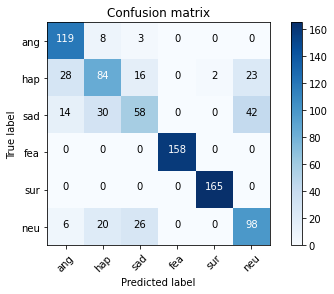

In [356]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.924
Test Set F-score =  0.924
Test Set Precision =  0.926
Test Set Recall =  0.925
Confusion matrix, without normalization
[[356   0   1   0   1  12]
 [  3 305  14   0   0  25]
 [ 23  29 291   0   0  13]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [ 15  17   6   0   1 311]]


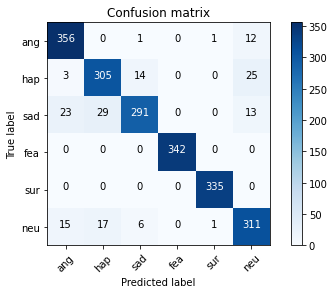

In [357]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=32)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.727
Test Set F-score =  0.708
Test Set Precision =  0.709
Test Set Recall =  0.722
Confusion matrix, without normalization
[[116   6   1   0   1   6]
 [ 32  69  15   0   7  30]
 [ 18  27  54   0   0  45]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  7  18  28   0   5  92]]


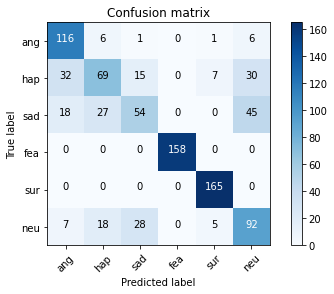

In [358]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.829
Test Set F-score =  0.828
Test Set Precision =  0.833
Test Set Recall =  0.830
Confusion matrix, without normalization
[[336   4   8   0   2  20]
 [ 39 237  21   0  11  39]
 [ 47  40 224   0   2  43]
 [  0   0   0 342   0   0]
 [  3   0   5   0 327   0]
 [ 21  29  22   0   3 275]]


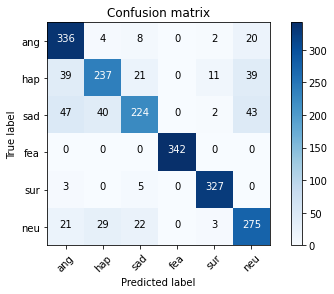

In [359]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=64)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.693
Test Set F-score =  0.670
Test Set Precision =  0.678
Test Set Recall =  0.688
Confusion matrix, without normalization
[[109   6   3   0   2  10]
 [ 45  52  14   0  10  32]
 [ 21  22  51   0   5  45]
 [  0   0   0 158   0   0]
 [  5   0   3   0 157   0]
 [  9  16  21   0   7  97]]


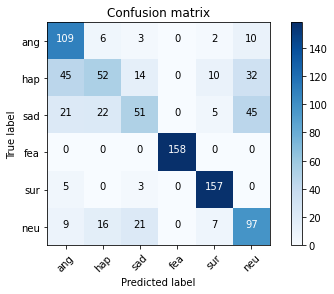

In [360]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.749
Test Set F-score =  0.744
Test Set Precision =  0.761
Test Set Recall =  0.750
Confusion matrix, without normalization
[[325   6   6   0   5  28]
 [104 161  20   0  16  46]
 [ 65  33 184   0   7  67]
 [  0   0   0 342   0   0]
 [ 12   9   5   0 306   3]
 [ 29  29  34   0   4 254]]


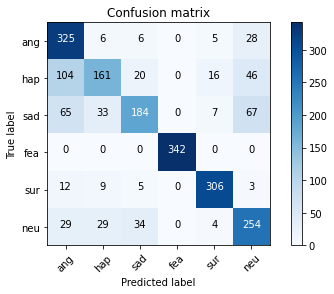

In [361]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=400, min_samples_split=128)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.654
Test Set F-score =  0.632
Test Set Precision =  0.646
Test Set Recall =  0.652
Confusion matrix, without normalization
[[110   4   3   0   3  10]
 [ 48  47  13   0  15  30]
 [ 25  14  46   0   7  52]
 [  0   0   0 158   0   0]
 [ 13   8   3   0 136   5]
 [ 11  15  24   0   8  92]]


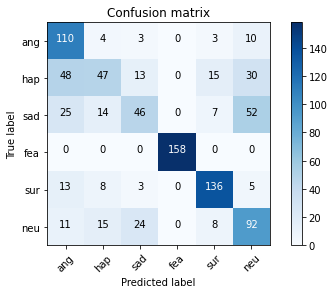

In [362]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


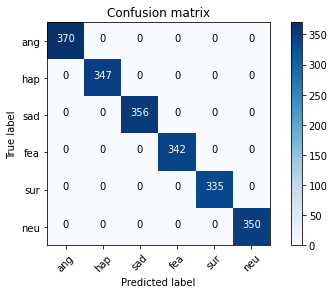

In [363]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=2)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.764
Test Set F-score =  0.752
Test Set Precision =  0.751
Test Set Recall =  0.760
Confusion matrix, without normalization
[[120  10   0   0   0   0]
 [ 18  90  18   0   1  26]
 [ 15  25  59   0   0  45]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  4  23  27   0   0  96]]


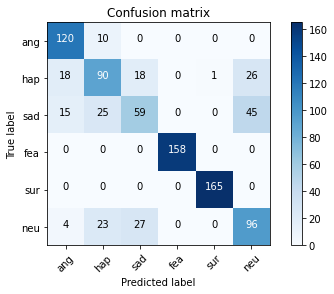

In [364]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


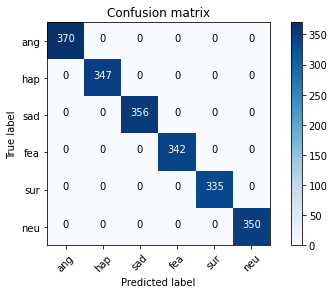

In [365]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=4)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.764
Test Set F-score =  0.751
Test Set Precision =  0.750
Test Set Recall =  0.761
Confusion matrix, without normalization
[[124   4   2   0   0   0]
 [ 24  86  15   0   1  27]
 [ 14  28  61   0   0  41]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  5  22  29   0   0  94]]


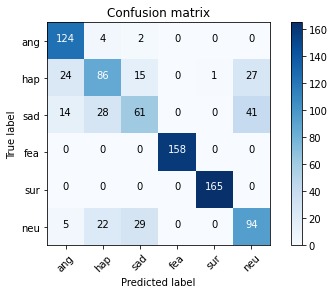

In [366]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  1.000
Test Set F-score =  1.000
Test Set Precision =  1.000
Test Set Recall =  1.000
Confusion matrix, without normalization
[[370   0   0   0   0   0]
 [  0 347   0   0   0   0]
 [  0   0 356   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  0   0   0   0   0 350]]


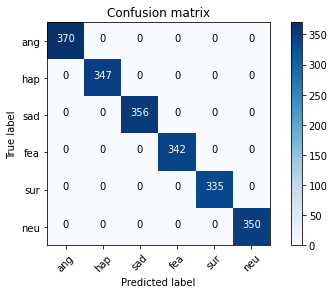

In [367]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=8)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.760
Test Set F-score =  0.746
Test Set Precision =  0.746
Test Set Recall =  0.756
Confusion matrix, without normalization
[[120  10   0   0   0   0]
 [ 22  89  16   0   1  25]
 [ 14  28  56   0   0  46]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  5  20  29   0   0  96]]


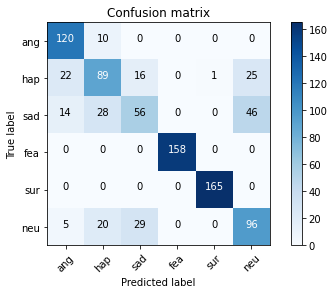

In [368]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.993
Test Set F-score =  0.993
Test Set Precision =  0.993
Test Set Recall =  0.993
Confusion matrix, without normalization
[[368   0   1   0   0   1]
 [  0 342   1   0   0   4]
 [  2   2 352   0   0   0]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [  1   3   0   0   0 346]]


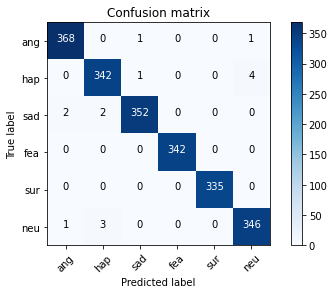

In [369]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=16)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.761
Test Set F-score =  0.746
Test Set Precision =  0.747
Test Set Recall =  0.757
Confusion matrix, without normalization
[[122   6   1   0   0   1]
 [ 24  83  15   0   4  27]
 [ 13  31  57   0   0  43]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  6  19  25   0   0 100]]


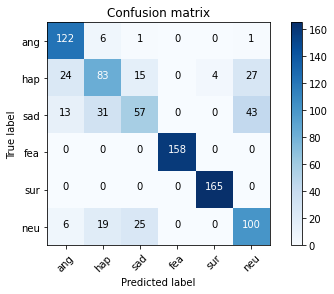

In [370]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.926
Test Set F-score =  0.927
Test Set Precision =  0.927
Test Set Recall =  0.927
Confusion matrix, without normalization
[[357   0   4   0   1   8]
 [  3 304  15   0   1  24]
 [ 22  27 295   0   0  12]
 [  0   0   0 342   0   0]
 [  0   0   0   0 335   0]
 [ 15  15   7   0   1 312]]


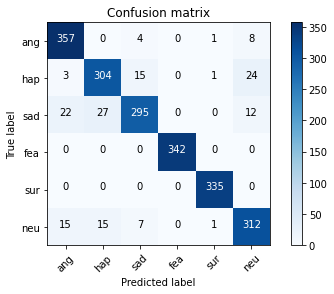

In [371]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=32)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.736
Test Set F-score =  0.718
Test Set Precision =  0.721
Test Set Recall =  0.731
Confusion matrix, without normalization
[[116   4   2   0   1   7]
 [ 30  74  13   0   7  29]
 [ 19  24  54   0   1  46]
 [  0   0   0 158   0   0]
 [  0   0   0   0 165   0]
 [  8  17  28   0   2  95]]


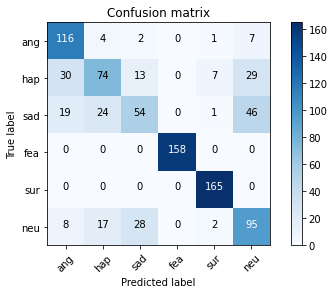

In [372]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.830
Test Set F-score =  0.828
Test Set Precision =  0.834
Test Set Recall =  0.831
Confusion matrix, without normalization
[[334   4   6   0   1  25]
 [ 39 237  20   0  12  39]
 [ 45  39 222   0   4  46]
 [  0   0   0 342   0   0]
 [  3   0   5   0 327   0]
 [ 23  24  21   0   2 280]]


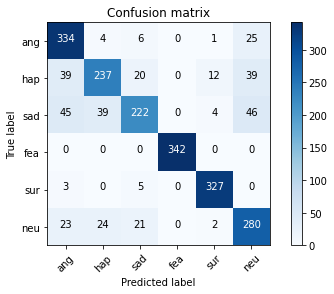

In [373]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=64)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.698
Test Set F-score =  0.676
Test Set Precision =  0.687
Test Set Recall =  0.694
Confusion matrix, without normalization
[[113   2   3   0   1  11]
 [ 43  55  14   0  11  30]
 [ 23  18  52   0   3  48]
 [  0   0   0 158   0   0]
 [  5   0   3   0 157   0]
 [ 11  15  24   0   7  93]]


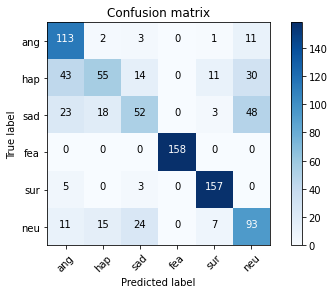

In [374]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)

Training Results
6
Test Set Accuracy =  0.741
Test Set F-score =  0.738
Test Set Precision =  0.755
Test Set Recall =  0.743
Confusion matrix, without normalization
[[319   8   6   0   8  29]
 [100 164  16   0  16  51]
 [ 64  36 183   0   8  65]
 [  0   0   0 342   0   0]
 [ 17   9   5   0 296   8]
 [ 28  32  31   0   6 253]]


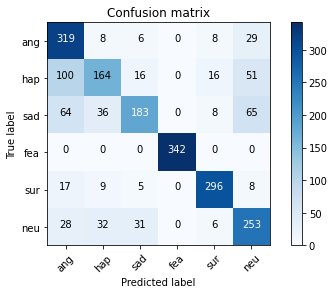

In [375]:
# RFC Training and Testing 30 sec Duration
rfc = RandomForestClassifier(n_estimators=800, min_samples_split=128)
rfc.fit(X_train_30_mel, y_train_30_mel)

# Training
pred_probs = rfc.predict_proba(X_train_30_mel)
print('Training Results')
display_results(y_train_30_mel, pred_probs)

Testing Results
6
Test Set Accuracy =  0.649
Test Set F-score =  0.629
Test Set Precision =  0.643
Test Set Recall =  0.647
Confusion matrix, without normalization
[[112   2   3   0   2  11]
 [ 49  48  13   0  12  31]
 [ 24  19  46   0   7  48]
 [  0   0   0 158   0   0]
 [ 17   8   3   0 128   9]
 [ 10  17  23   0   8  92]]


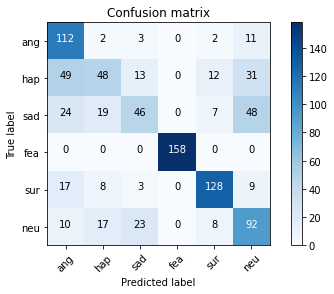

In [376]:
# Testing
pred_probs = rfc.predict_proba(X_test_30_mel)
print('Testing Results')
display_results(y_test_30_mel, pred_probs)